# Lending Club Case Study

### Import libraries, load and display the data

In [266]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [267]:
# Import the dataset into dataframe

loan_df = pd.read_csv("loan.csv", low_memory=False)   # The low_memory parameter ignores low memory warning

In [3]:
# Display the number of columns and rows of dataframe

print(loan_df.shape)

(39717, 111)


In [4]:
# Display information about the dataframe

print(loan_df.info(verbose=True, show_counts=True)) # The verbose and show_counts parameter expands displayed info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [5]:
# Display first few rows of the dataframe 

pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display
loan_df.head(30)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN

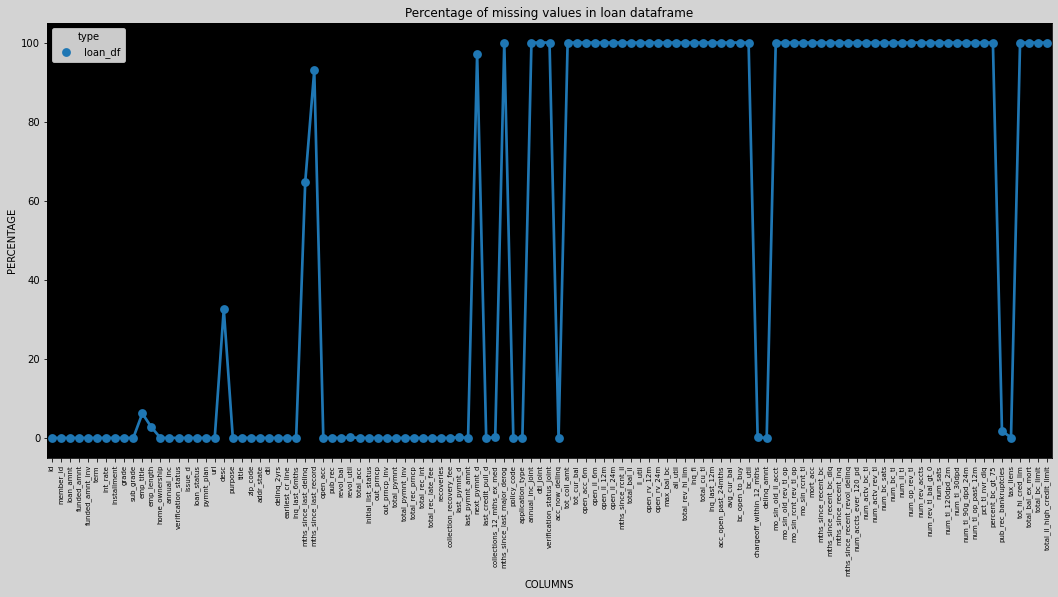

In [6]:
# Percentage of missing values in the dataframe

fig = plt.figure(figsize=(18,8))
miss_loan_df = pd.DataFrame((loan_df.isnull().sum())*100/loan_df.shape[0]).reset_index()
miss_loan_df["type"] = "loan_df"
ax = sns.pointplot("index",0,data=miss_loan_df,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in loan dataframe")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

### Clean the data process

Generalised Flow to clean The Data
1. Fix Rows and columns
2. Fix Missing Values
3. Standardise values
4. Fix Invalid Values
5. Filter Data

1. Fixing Rows And Columns<br>
     A. Fixing Rows
        1. detect unnacessary Rows
            - No unwanted header and footer rows present
        2.  delete summary Rows
            - No summary rows like total subtotal present in Data Set
        3. delete extra Rows
            - as per bellow code snippet 1 & 2 there is no extra / empty / duplicate rows in Dataset

    B. Fixing Columns:
        - Add coulumn names if missing 
            - no missing column names
        
        - delete unnacessary column (bellow is the list of columns to be deleted(51)) Code snippet:- 3
            - emp_title                     - mths_since_last_major_derog        - annual_inc_joint
            - dti_joint                     - verified_status_joint              - tot_cur_bal
            - open_acc_6m                   - open_il_6m                         - open_il_12m
            - open_il_24m                   - mths_since_rcnt_il                 - total_bal_il
            - il_util                       - open_rv_12m                        - open_rv_24m
            - max_bal_bc                    - all_util                           - inq_fi
            - total_cu_tl                   - inq_last_12m                       - acc_open_past_24mths
            - avg_cur_bal                   - bc_open_to_buy                     - bc_util
            - mo_sin_old_il_acct            - mo_sin_old_rev_tl_op               - mo_sin_rcnt_rev_tl_op
            - mo_sin_rcnt_tl - mort_acc     - mths_since_recent_bc               - mths_since_recent_bc_dlq
            - mths_since_recent_inq         - mths_since_recent_revol_delinq     - num_accts_ever_120_pd
            - num_actv_bc_tl                - num_actv_rev_tl                    - num_bc_sats
            - num_bc_tl                     - num_il_tl                          - num_op_rev_tl
            - num_rev_accts                 - num_rev_tl_bal_gt_0                - num_sats
            - num_tl_op_past_12m            - pct_tl_nvr_dlq                     - percent_bc_gt_75
            - tot_hi_cred_lim               - total_bal_ex_mort                  - total_bc_limit
            - total_il_high_credit_limit
            
        - spliting columns for more data
            Following columns are date columns may required to split if used in analysis ->
            loan_issue_date , earliest_cr_line, last_pymnt_d , next_pymnt_d, last_credit_pull_d 
        
        - Rename Column Consistently (columns renamed as listed bellow) Code snippet:- 4
            issue_d   ---renaming as-->	loan_issue_date
            out_prncp ---renaming as-->	remained_out_prncp
            
        - Merge columns for identifiers
            no merging of columns is required at the moment
            
        - Align missaligned columns
            no Miss aligned columns were found

### Clean the data

In [268]:
# Finding duplicate rows and delete/merge as required

duplicate_rows = loan_df[loan_df.duplicated()]
print(duplicate_rows.shape)                     

# As no duplicate row found, no need to delete or merge the data of any customer

(0, 111)


In [269]:
# Drop rows which has 'loan_status' value as 'Current' (That is consider only Fully Paid' or 'Charged Off' records as we know that they are defaulters or not)

loan_df = loan_df[loan_df["loan_status"] != 'Current']

In [270]:
# Drop the columns which are not required to achieve our goal, such as customer behaviour variables, and columns which do not contain any value (all NaNs)

loan_df.drop([
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'pub_rec_bankruptcies',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit'], axis = 1, inplace=True)

In [271]:
# Finding columns and rows with empty (.eq('')) or NaN (.isnull()) values in the dataframe

missing_cols, missing_rows = ((loan_df.isnull().sum(x) | loan_df.eq('').sum(x)).loc[lambda x: x.gt(0)].index for x in (0, 1))

loan_df.loc[missing_rows, missing_cols]

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN
2,NaN,10+ years,NaN,real estate business,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.0,NaN
5,Veolia Transportaton,3 years,NaN,My wedding loan I promise to pay back,NaN,NaN
...,...,...,...,...,...,...
39706,NaN,< 1 year,Need a loan to remodel my kitchen,remodelin my kitchen,0.0,0.0
39709,Self-Employeed,< 1 year,NaN,P's Family Credit Loan,0.0,44.0
39710,Rush Univ Med Grp,1 year,NaN,My Credit Card Loan,0.0,0.0
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,0.0,0.0


In [307]:
# Convert float values of funded_amnt_inv column to integer values

loan_df["funded_amnt_inv"] = loan_df["funded_amnt_inv"].astype(int)

In [12]:
# Remove ' months' text from values of 'term' column and convert the column dtype to integer

loan_df["term"] = loan_df["term"].map(lambda x: x.rstrip(' months'))
loan_df["term"] = loan_df["term"].astype(int)

In [333]:
# Remove '%' text from values of 'int_rate' column and convert the column dtype to float

loan_df["int_rate"] = loan_df["int_rate"].map(lambda x: x.rstrip('%'))
loan_df["int_rate"] = loan_df["int_rate"].astype(float)

In [334]:
# Bin the 'int_rate' data into 10 buckets 
custom_int_rate_bucket_arr = np.linspace(5,25,11)
custom_int_rate_bucket_arr

array([ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.])

In [335]:
# Replace the values of 'int_rate' column with created bins and display its value_counts()

loan_df["int_rate"] = pd.cut(loan_df["int_rate"], custom_int_rate_bucket_arr)
loan_df["int_rate"].value_counts()

(11.0, 13.0]    7674
(13.0, 15.0]    6583
(9.0, 11.0]     6516
(7.0, 9.0]      5993
(15.0, 17.0]    4440
(5.0, 7.0]      3815
(17.0, 19.0]    2156
(19.0, 21.0]    1059
(21.0, 23.0]     301
(23.0, 25.0]      40
Name: int_rate, dtype: int64

In [336]:
# Convert float values of 'installment' column to an integer values

loan_df["installment"] = loan_df["installment"].round().astype(int)

In [337]:
# Bin the 'installment' data into 10 buckets and display its value_counts()

custom_installment_bucket_arr = np.linspace(0,1500,16)
custom_installment_bucket_arr

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500.])

In [338]:
# Replace the values of 'installment' column with created bins and display its value_counts()

loan_df["installment"] = pd.cut(loan_df["installment"], custom_installment_bucket_arr)
loan_df["installment"].value_counts()

(100.0, 200.0]      9093
(200.0, 300.0]      7601
(300.0, 400.0]      7108
(0.0, 100.0]        4021
(400.0, 500.0]      3960
(500.0, 600.0]      2588
(600.0, 700.0]      1810
(800.0, 900.0]      1050
(700.0, 800.0]       826
(900.0, 1000.0]      285
(1100.0, 1200.0]      90
(1000.0, 1100.0]      86
(1200.0, 1300.0]      57
(1300.0, 1400.0]       2
(1400.0, 1500.0]       0
Name: installment, dtype: int64

In [339]:
# Remove unwanted text and convert 'emp_length' column values to integer

loan_df["emp_length"] = loan_df["emp_length"].fillna('0')                          # Remove NaN values
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip(' years'))    # Remove ' years'
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip(' year'))     # Remove ' year'
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.lstrip('< '))        # Remove '< '
loan_df["emp_length"] = loan_df["emp_length"].map(lambda x: x.rstrip('+'))         # Remove '+'

loan_df["emp_length"] = loan_df["emp_length"].astype(int)                          # Convert to integer

In [340]:
# Remove outliers from 'annual_inc' column

Q1 = loan_df["annual_inc"].quantile(0.25)
Q3 = loan_df["annual_inc"].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

#left, right = left.align(right, axis=1, copy=False)
loan_df = loan_df[~((loan_df["annual_inc"] < (Q1 - 1.5 * IQR)) | (loan_df["annual_inc"] > (Q3 + 1.5 * IQR)))]

print(loan_df.shape)  # Display the shape of dataframe after removing rows containing outliers in 'annual_inc' column

82000.0
40000.0
42000.0
(36815, 27)


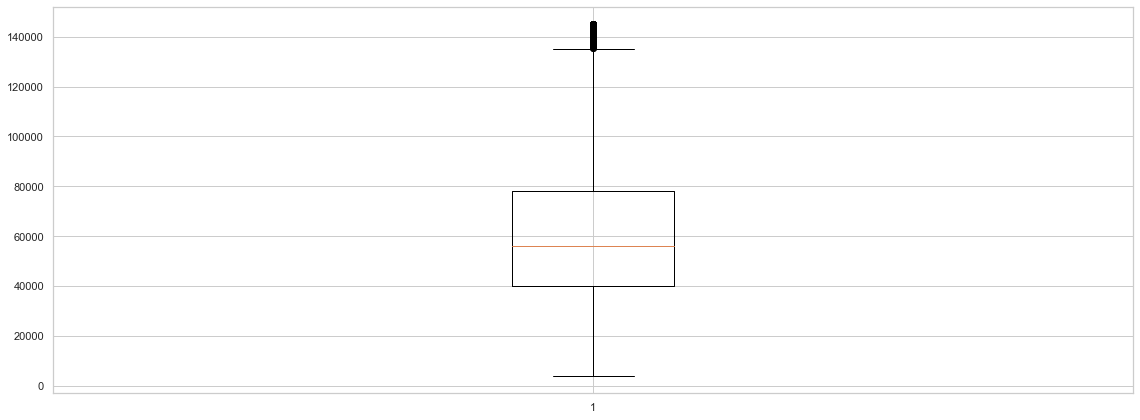

In [341]:
# Plot a boxplot after removing outliers from 'annual_inc' column

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["annual_inc"])
plt.show()

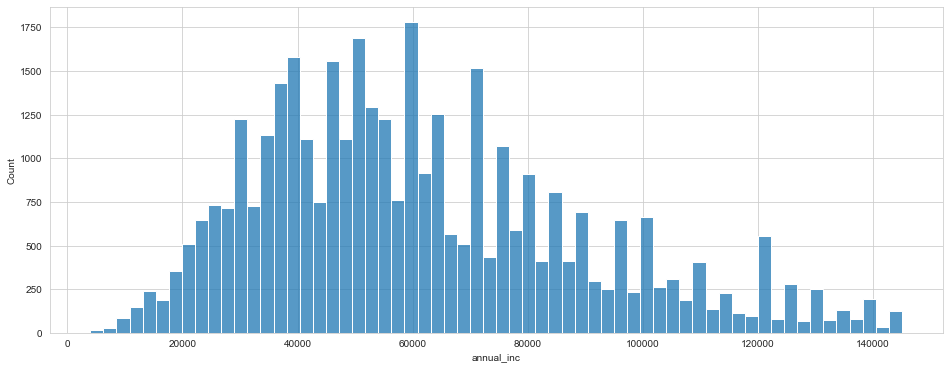

In [22]:
fig = plt.figure(figsize=(16,6))
sns.set_style("whitegrid") 
sns.histplot(loan_df["annual_inc"]) 
plt.show()

In [23]:
# Bin the 'annual_inc' data into 10 buckets and display its value_counts()

#custom_annual_inc_bucket_arr = np.linspace(0,15000,16)
#custom_annual_inc_bucket_arr

In [24]:
# Convert mmm-yy format 'issue_d' column values to ccyy-mm-dd format

loan_df["issue_d"] = loan_df["issue_d"].apply(lambda x : "01-"+x)
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"])

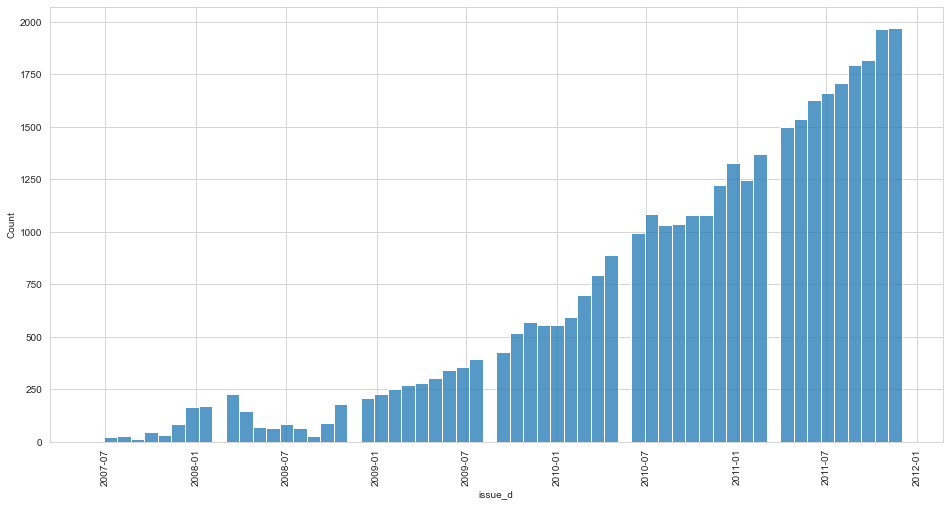

In [25]:
# Plot a bar graph for issue_d

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["issue_d"]) 
plt.show()

In [26]:
# Understand the 'dti' spread. There appears to be no outlier.

print(loan_df["dti"].describe())

count    36815.000000
mean        13.437614
std          6.660651
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64


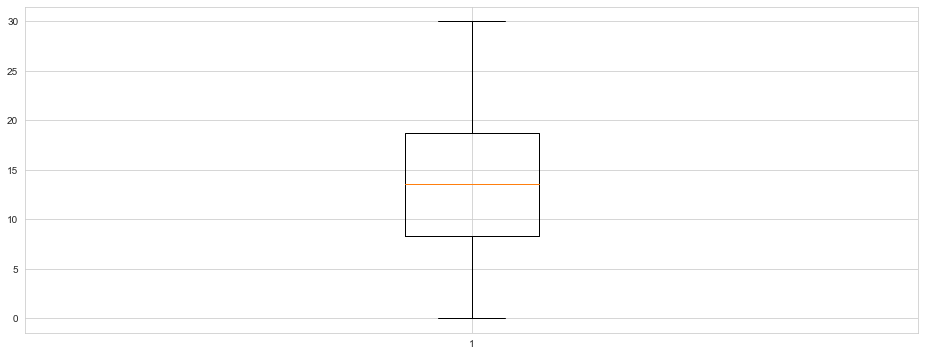

In [27]:
# Plot a boxplot for 'dti' column

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["dti"])
plt.show()

### Display the data after clean up

In [28]:
# Display the number of columns and rows of data after cleanup

print(loan_df.shape)

(36815, 27)


In [29]:
# Display first few rows of cleaned up dataframe

pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display
loan_df.head(30)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record
0,1077501,1296599,5000,5000,4975,36,"(9.0, 11.0]","(100.0, 200.0]",B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN
1,1077430,1314167,2500,2500,2500,60,"(15.0, 17.0]","(0.0, 100.0]",C,C4,Ryder,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN
2,1077175,1313524,2400,2400,2400,36,"(15.0, 17.0]","(0.0, 100.0]",C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN
3,1076863,1277178,10000,10000,10000,36,"(13.0, 15.0]","(300.0, 400.0]",C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,NaN
5,1075269,1311441,5000,5000,5000,36,"(7.0, 9.0]","(100.0, 200.0]",A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,NaN
6,1069639,1304742,7000,7000,7000,60,"(15.0, 17.0]","(100.0, 200.0]",C,C5,Southern Star Photography,8,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,NaN,NaN
7,1072053,1288686,3000,3000,3000,36,"(17.0, 19.0]","(100.0, 200.0]",E,E1,MKC Accounting,9,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,NaN,NaN
8,1071795,1306957,5600,5600,5600,60,"(21.0, 23.0]","(100.0, 200.0]",F,F2,NaN,4,OWN,40000.00,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,NaN,NaN
9,1071570,1306721,5375,5375,5350,60,"(11.0, 13.0]","(100.0, 200.0]",B,B5,Starbucks,1,RENT,15000.00,Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,NaN,NaN
10,1070078,1305201,6500,6500,6500,60,"(13.0, 15.0]","(100.0, 200.0]",C,C3,Southwest Rural metro,5,OWN,72000.00,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,NaN,NaN


In [30]:
# Display information of the cleaned up data

print(loan_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36815 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      36815 non-null  int64         
 1   member_id               36815 non-null  int64         
 2   loan_amnt               36815 non-null  int64         
 3   funded_amnt             36815 non-null  int64         
 4   funded_amnt_inv         36815 non-null  int64         
 5   term                    36815 non-null  int64         
 6   int_rate                36815 non-null  category      
 7   installment             36815 non-null  category      
 8   grade                   36815 non-null  object        
 9   sub_grade               36815 non-null  object        
 10  emp_title               34599 non-null  object        
 11  emp_length              36815 non-null  int64         
 12  home_ownership          36815 non-null  object

### Data Analysis

#### Univariate Analysis

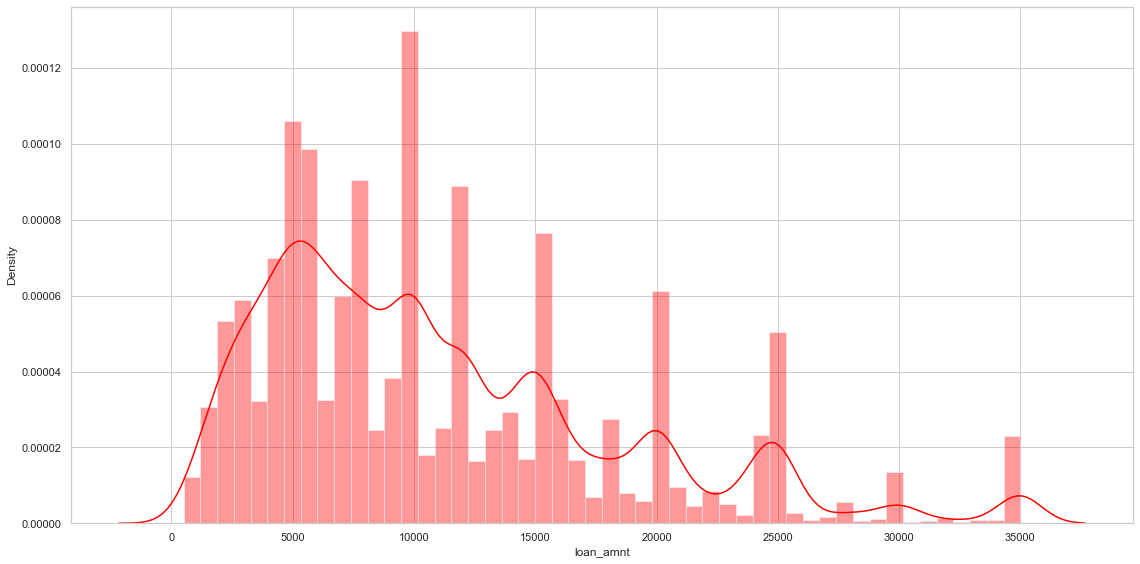

In [316]:
# Density plot of Loan Amount ('loan_amnt')

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(loan_df["loan_amnt"], color='red') 
plt.show()

Observation: Number of customers taking loan of 5000 are higher in number.

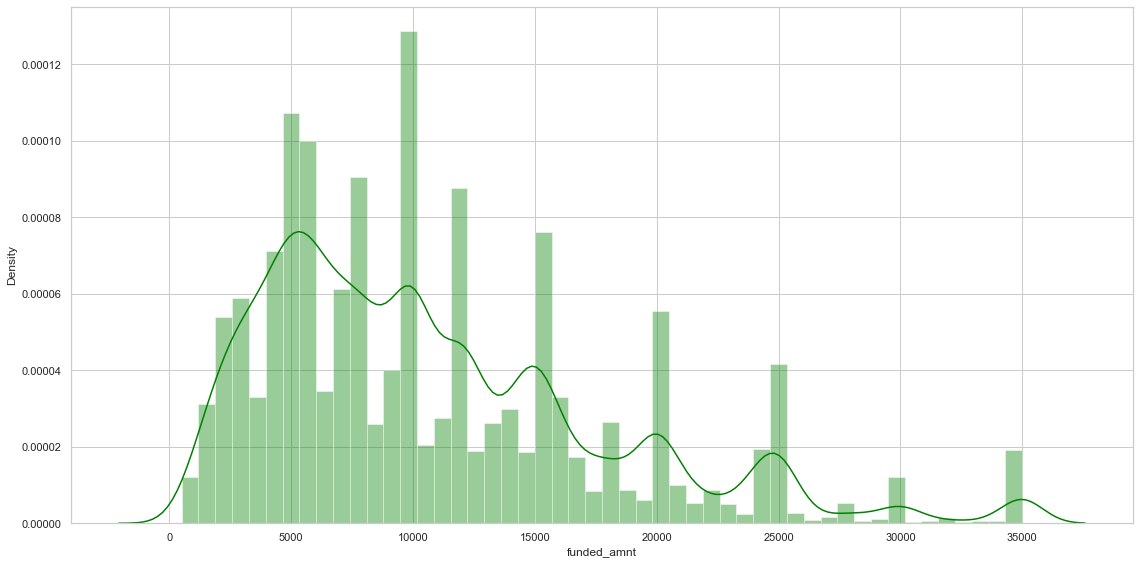

In [318]:
# Density plot of Funded Amount ('funded_amnt')

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(loan_df["funded_amnt"], color='green') 
plt.show()

Observation: More number of customers are being funded the loans between 2500 and 15000

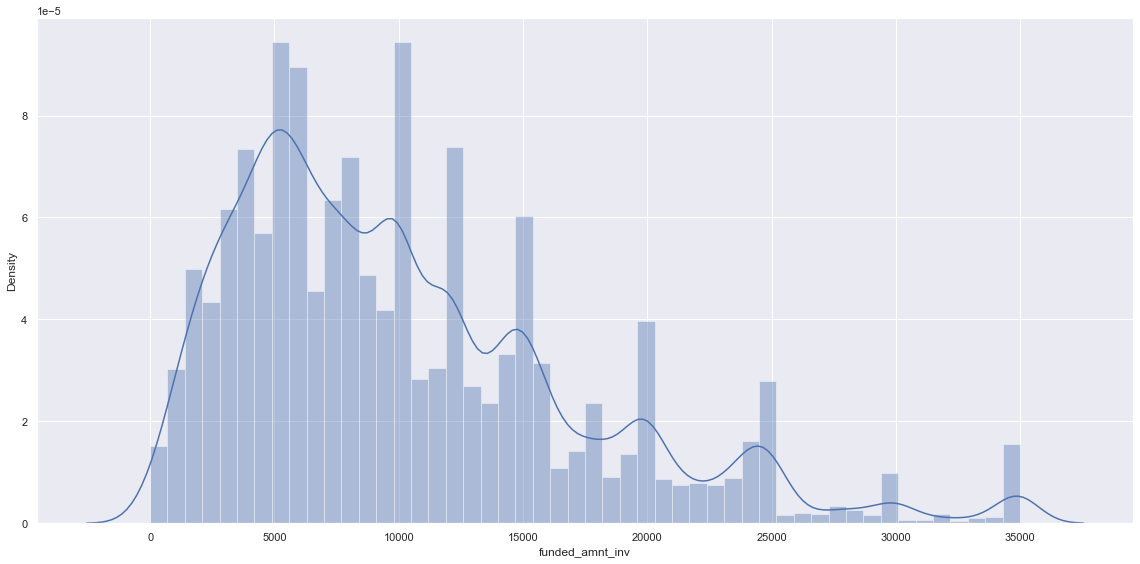

In [319]:
# Density plot of Loan Amount ('funded_amnt_inv')

fig = plt.figure(figsize=(16,8))
sns.set_style("darkgrid") 
sns.distplot(loan_df["funded_amnt_inv"]) 
plt.show()

Observation: The Loan funded by investors looks very similar to the Loan Amount and Funded Amount. Let us plot all these parameters in the same plot below.

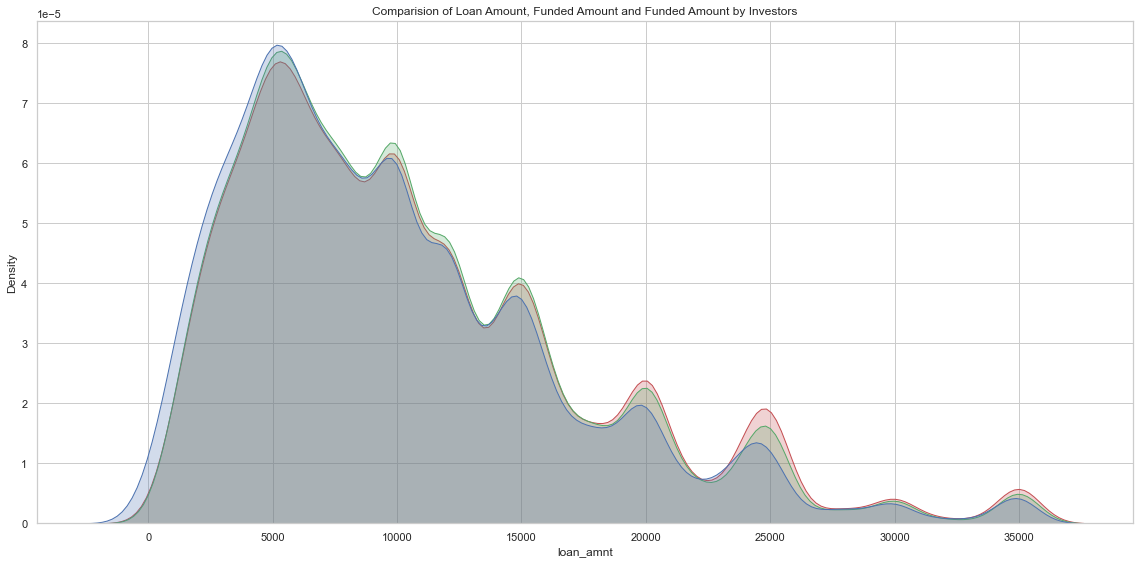

In [374]:
# Plotting distibutions of 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' on the same figure

fig = plt.figure(figsize=(16,8))
fig = sns.kdeplot(loan_df['loan_amnt'], shade=True, color="r")
fig = sns.kdeplot(loan_df['funded_amnt'], shade=True, color="g")
fig = sns.kdeplot(loan_df['funded_amnt_inv'], shade=True, color="b")
plt.title("Comparision of Loan Amount, Funded Amount and Funded Amount by Investors")
plt.show()

Observation: At lower loan amounts, the funded amount by investors is little bit higher. Whereas for higher loan amounts, it is other way around, i.e. the requested loan amounts are little on the higher side. In both the cases, the difference is not very high.

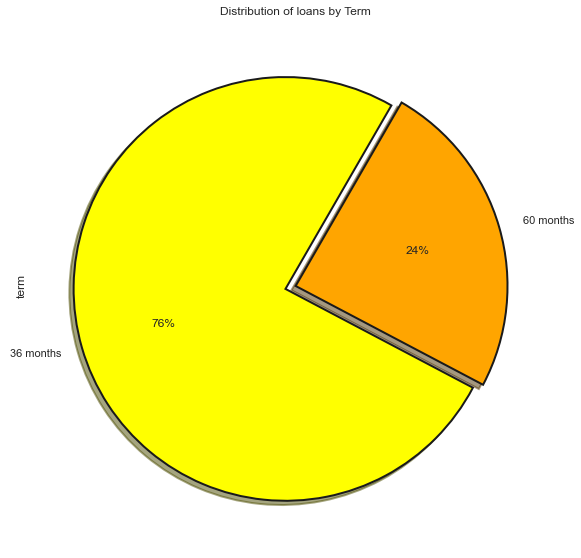

In [373]:
# Percentage distribution plot of 'term' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["term"].value_counts().plot.pie(autopct = "%1.0f%%",
                                        colors = ["yellow", "orange"], 
                                        startangle = 60, 
                                        wedgeprops = {"linewidth":2,"edgecolor":"k"},
                                        explode=(.05,0),
                                        shadow =True)
plt.title("Distribution of loans by Term")
plt.show()

Observation: The term distribution is higher for 36 months at 76%, whereas the term distribution for 60 months is 24%.

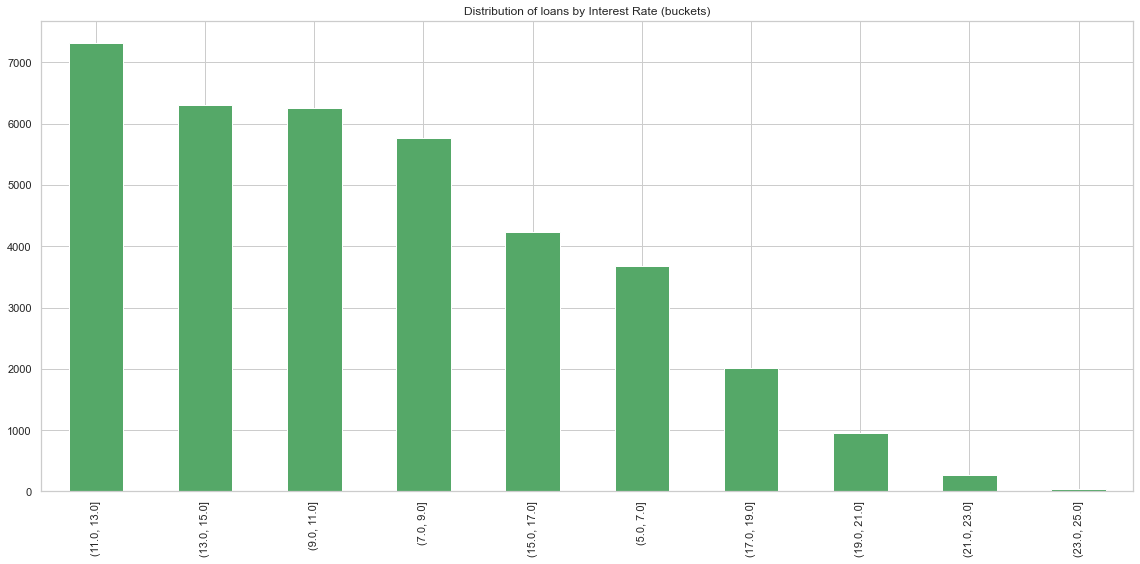

In [372]:
# The sorted bar plot of Interest Rate buckets

fig = plt.figure(figsize=(16,8))
loan_df["int_rate"].value_counts().plot(kind='bar', color='g')
plt.title("Distribution of loans by Interest Rate (buckets)")
plt.show()

Observation: The loans funded in the 11% to 13% bucket are highest, Whereas it is the lowest for 23% to 25% bucket.  

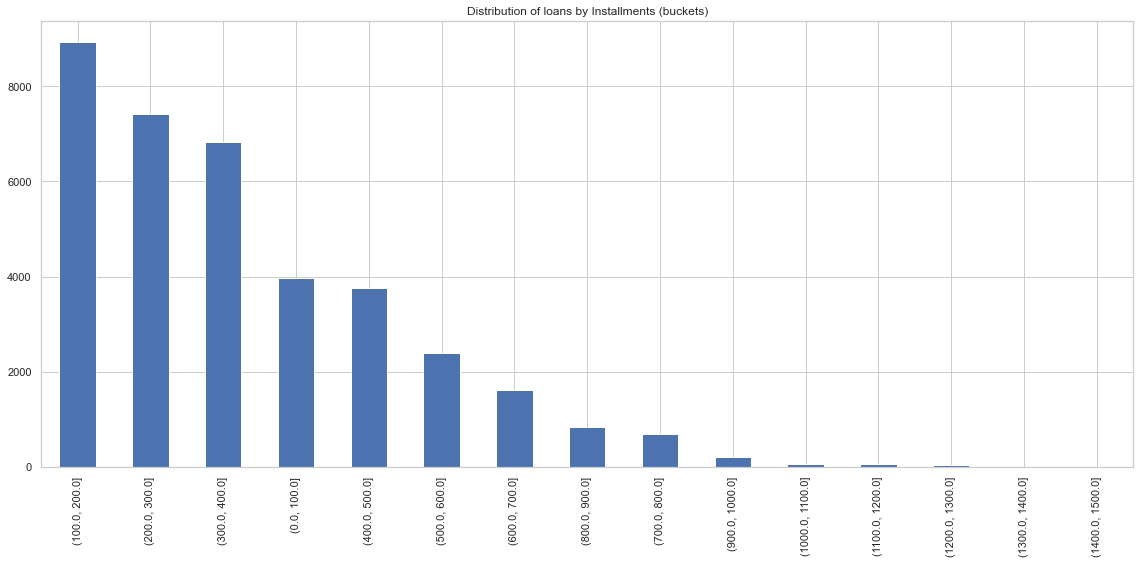

In [371]:
# The sorted bar plot of Installment buckets

fig = plt.figure(figsize=(16,8))
loan_df["installment"].value_counts().plot(kind='bar', color='b')
plt.title("Distribution of loans by Installments (buckets)")
plt.show()

Observation: The installments between 100 and 200 are higher in number, followed by 200 to 300 and 300 to 400. The lower number of borrower opted for installments 1000 and higher.

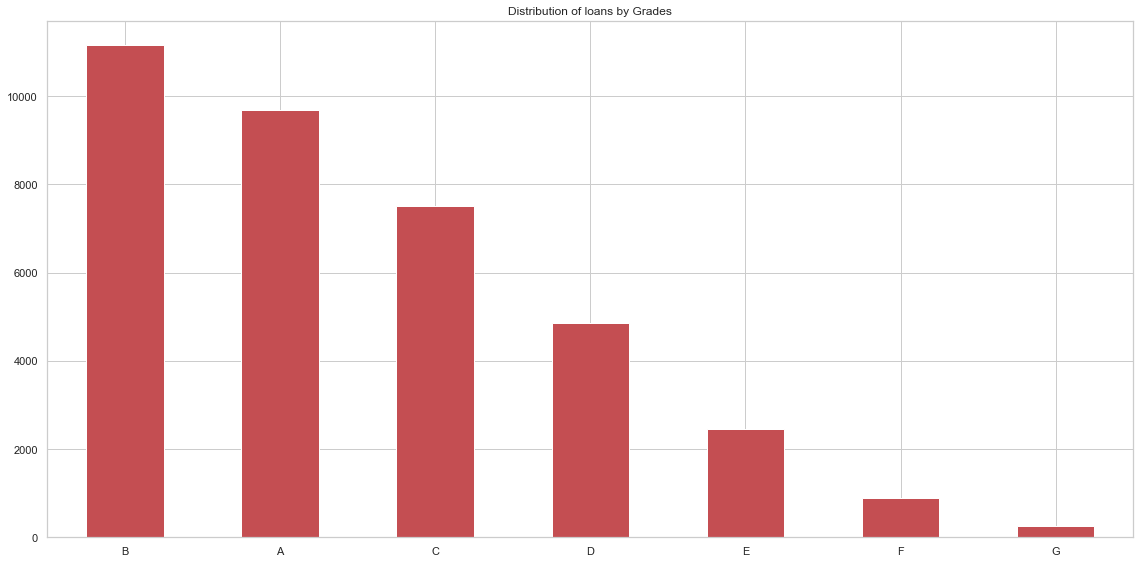

In [370]:
# The sorted bar plot of number of loans funded by grades 

fig = plt.figure(figsize=(16,8))
loan_df["grade"].value_counts().plot(kind='bar', color='r')
plt.xticks(rotation=0)
plt.title("Distribution of loans by Grades")
plt.show()

Observation: The loans issued of grade 'B' are higher in number, followed by gade 'A' and 'C'.

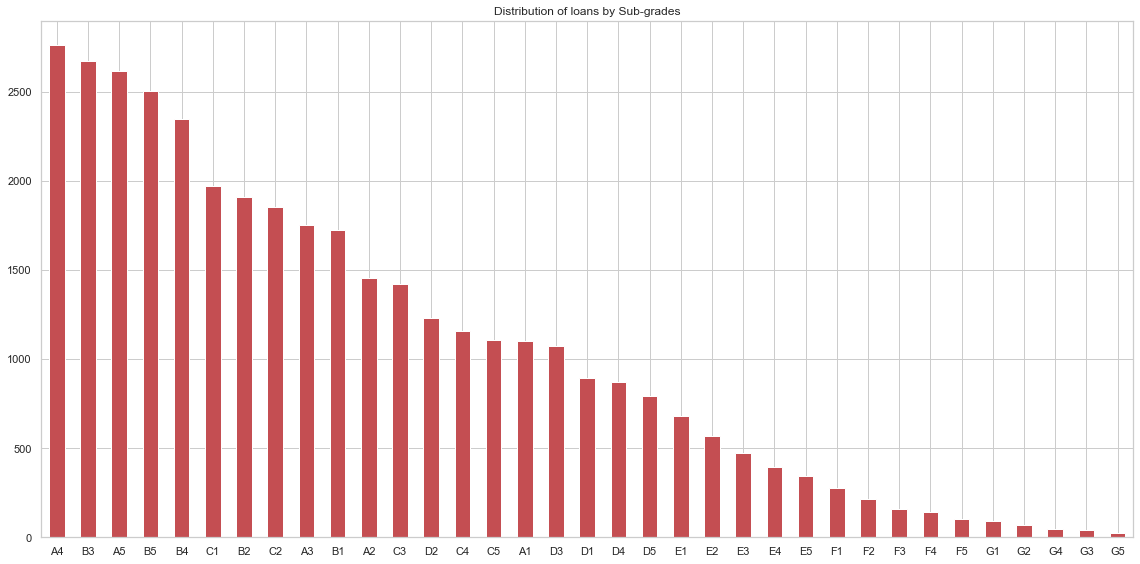

In [369]:
# The sorted bar plot of number of loans funded by sub_grades 

fig = plt.figure(figsize=(16,8))
loan_df["sub_grade"].value_counts().plot(kind='bar', color='r')
plt.xticks(rotation=0)
plt.title("Distribution of loans by Sub-grades")
plt.show()

Observation: The loans funded with sub-grade 'A4' is higher, followed by 'B3, 'A5', 'B5' and 'B4'.

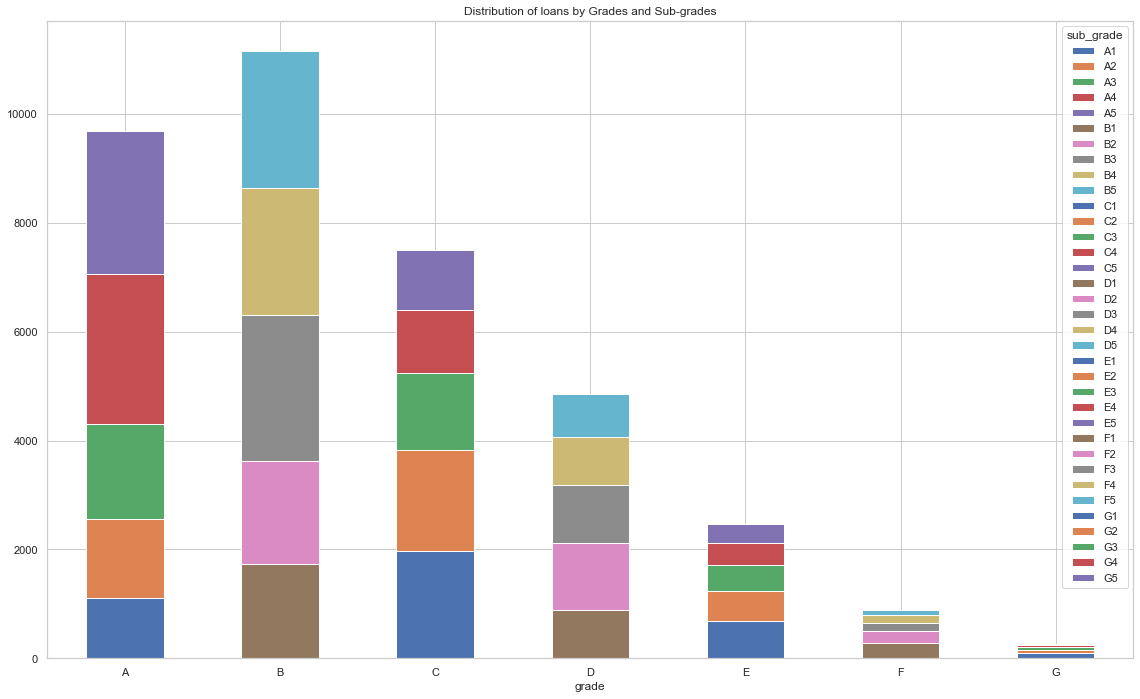

In [368]:
# The stacked bar plot of number of loans funded by grades and then by sub-grades 

loan_df.groupby("grade")["sub_grade"].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(16,10))
plt.xticks(rotation=0)
plt.title("Distribution of loans by Grades and Sub-grades")
plt.show()

Observation: The loans funded for grades 'B', 'A' and 'C' are higher.

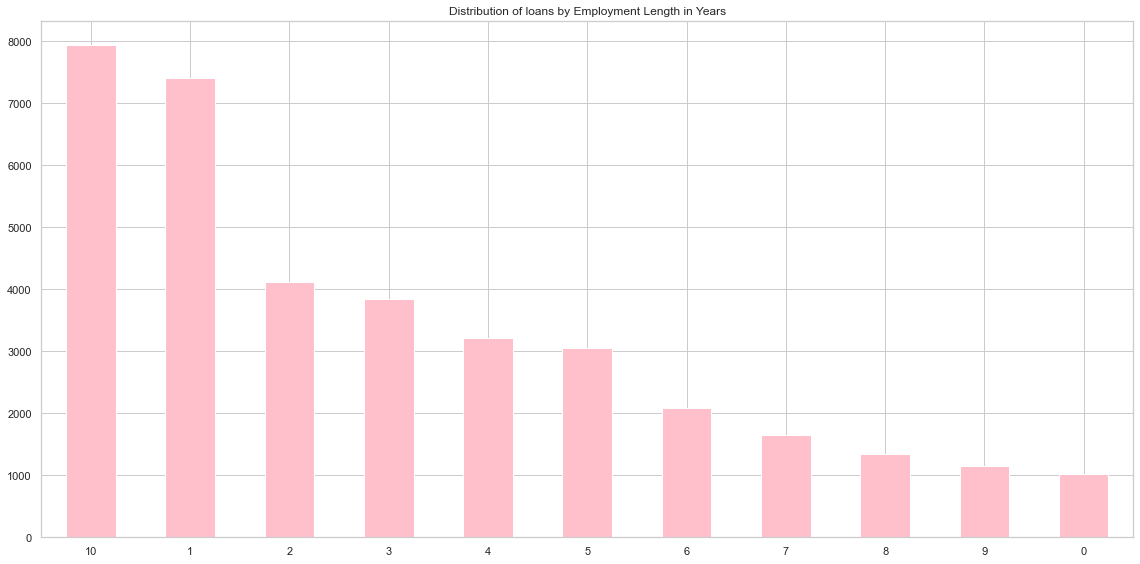

In [376]:
# The sorted bar plot of number of loans funded to applicants with Employment Length 

fig = plt.figure(figsize=(16,8))
loan_df["emp_length"].value_counts().plot(kind='bar', color='pink')
plt.xticks(rotation=0)
plt.title("Distribution of loans by Employment Length in Years")
plt.show()

Observation: Loans taken by borrowers having experience of 10 years and 1 year, are higher. 

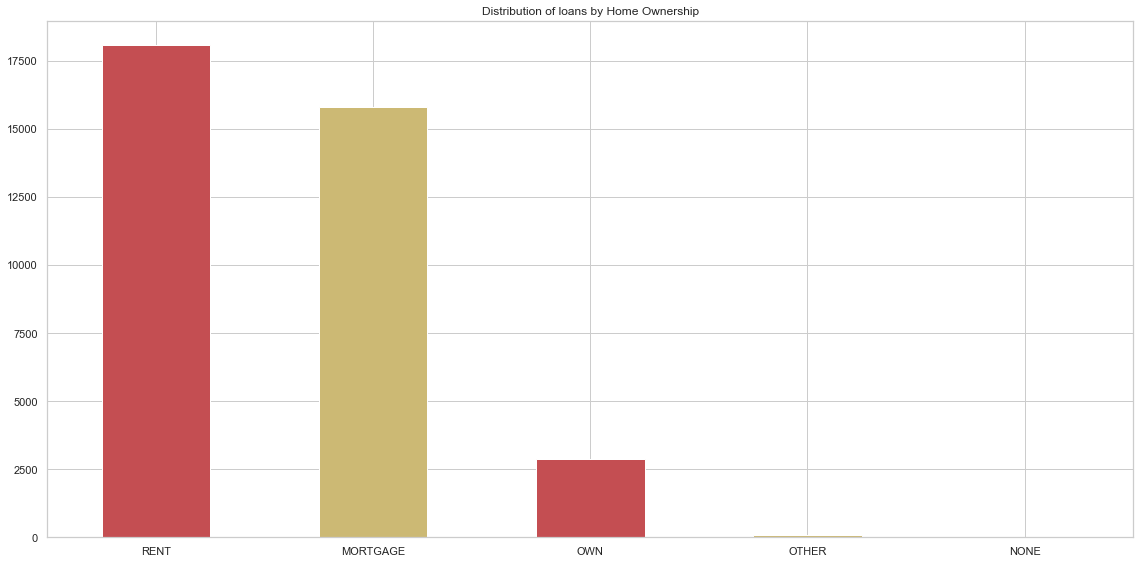

In [430]:
# The sorted bar plot of number of loans funded to applicants with Home Owenership status 

fig = plt.figure(figsize=(16,8))
loan_df["home_ownership"].value_counts().plot(kind='bar', color=("r","y"))
plt.xticks(rotation=0)
plt.title("Distribution of loans by Home Ownership")
plt.show()

Observation: The loans taken by borrowers with rented or mortgaged homes are higher.

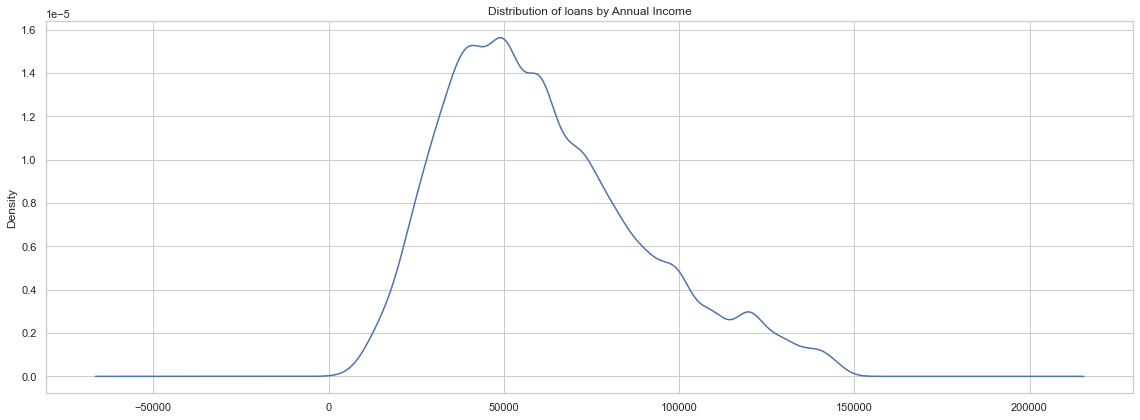

In [431]:
# The distribution plot of applicants by Annual Income  

fig = plt.figure(figsize=(16,6))
loan_df["annual_inc"].plot(kind='kde')
plt.title("Distribution of loans by Annual Income")
plt.show()

Observation: The peak of distribution plot is at 50000 and is left skewed.

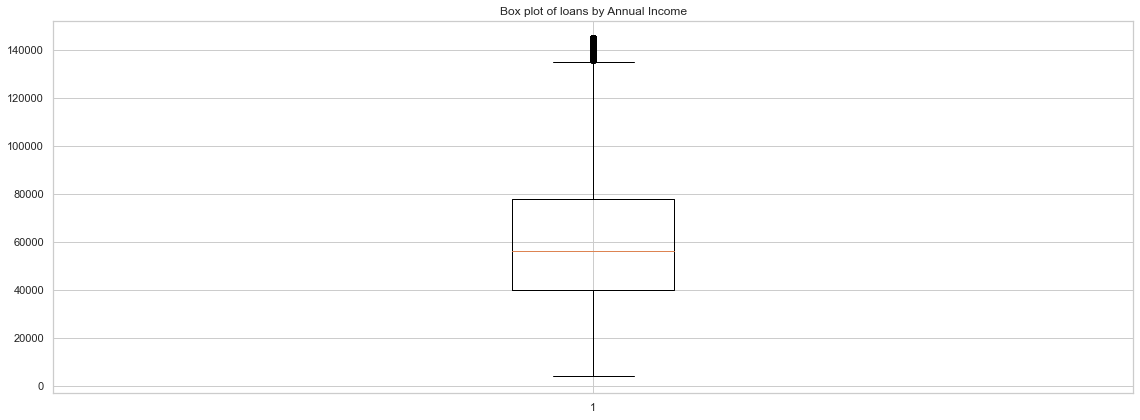

In [432]:
# A Boxplot after removing outliers from 'annual_inc' column

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["annual_inc"])
plt.title("Box plot of loans by Annual Income")
plt.show()

Observation: The 25th percentile is at 40000 and 75th percentile is at around 78000. Some outliers are included after upper fence.

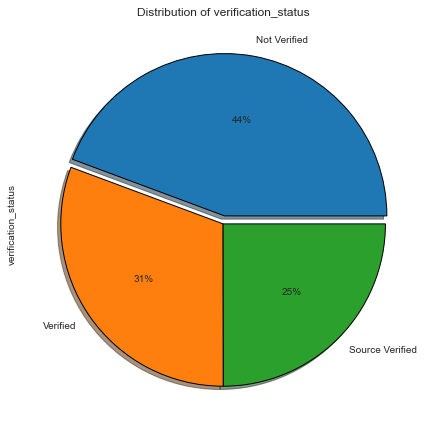

In [121]:
# Percentage distribution of 'verification_status' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["verification_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                       colors = None,
                                                       startangle = 0, 
                                                       wedgeprops = {"linewidth":1,"edgecolor":"k"},
                                                       explode=(.05,0,0),
                                                       shadow =True)
plt.title("Distribution of verification_status")
plt.show()

Observation: Most of the applicants (56%) have income sources either 'Verified' or 'Source Verified'.

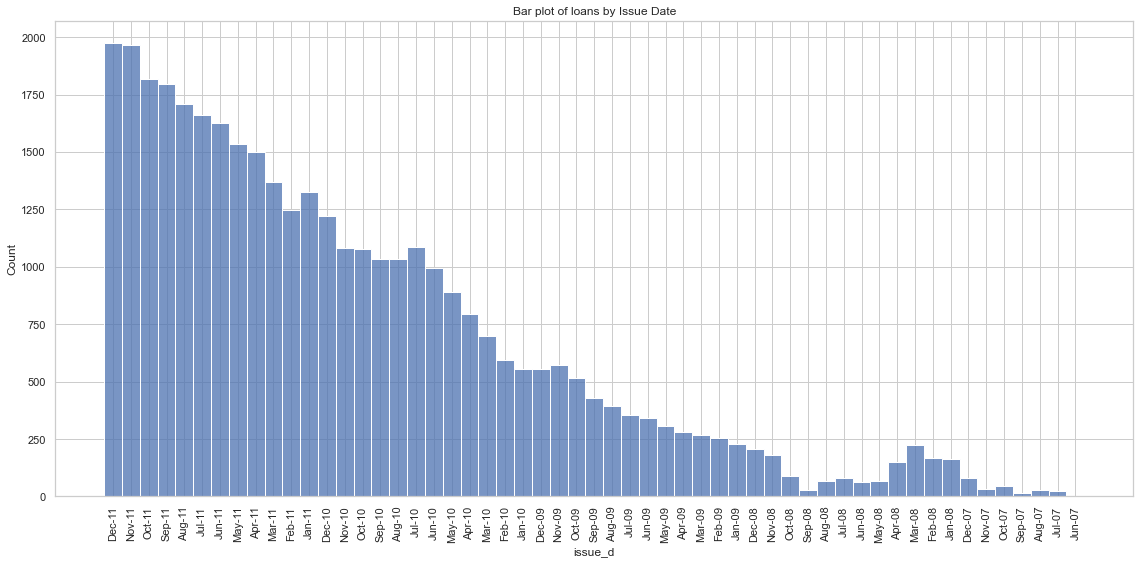

In [445]:
# Bar plot of borrowers by Issue Date 

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.histplot(loan_df["issue_d"]) 
plt.xticks(rotation=90)
plt.title("Bar plot of loans by Issue Date")
plt.show()

Observtion: The loans closer to the report date are higher which reduced gradually. However there are noticeable number of loans taken around March 2008 (Lehman brothers crash) are paid late.

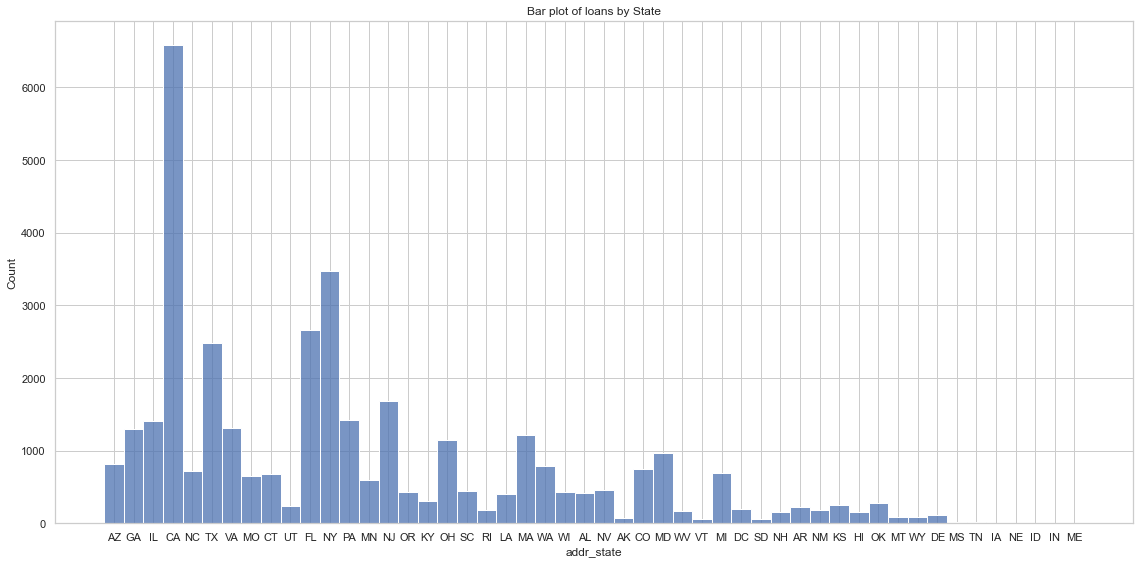

In [447]:
# Bar plot of borrowers by State

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.histplot(loan_df["addr_state"])
plt.xticks(rotation=0)
plt.title("Bar plot of loans by State")
plt.show()

Observation: The number of loans taken by borrowers from 'CA' California state are higher followed by that of 'NY' New York and 'FL Florida states.

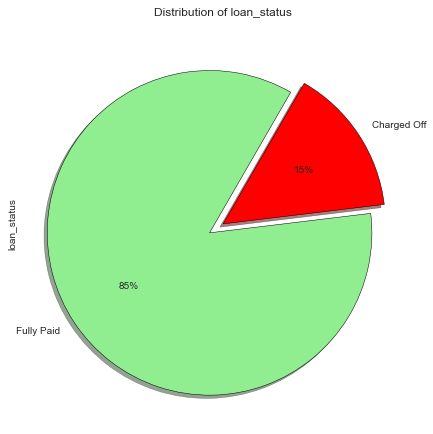

In [118]:
# Percentage distribution of 'loan_status' in pieplot

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
loan_df["loan_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                               colors = ["lightgreen", "red"],
                                               startangle = 60, 
                                               wedgeprops = {"linewidth":.5,"edgecolor":"k"},
                                               explode=(.1,0),
                                               shadow =True)
plt.title("Distribution of loan_status")
plt.show()

Observation: 85% of the loans are Fully Paid whereas 15% of the loans are Charged-off.

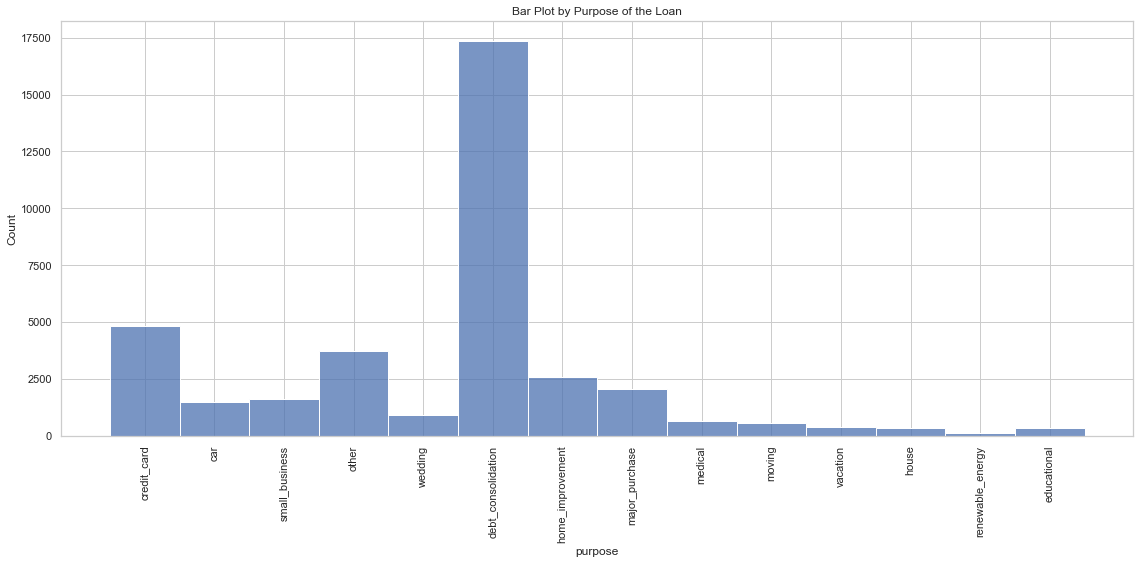

In [448]:
# Bar plot of loans by Purpose of the loan

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["purpose"]) 
plt.title("Bar Plot by Purpose of the Loan")
plt.show()

Observation: Loans taken for Debt Conciliation are higher than any other purpose.

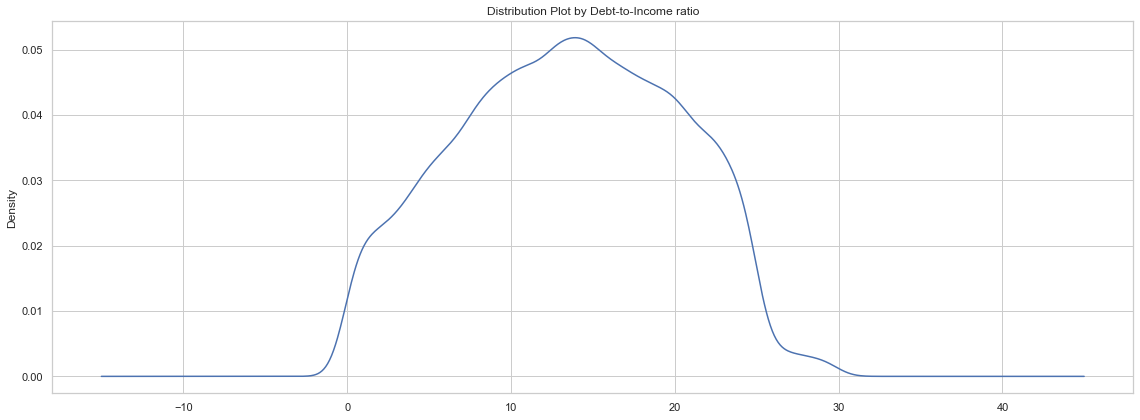

In [449]:
# Distribution plot by Debt-to-Income ratio

fig = plt.figure(figsize=(16,6))
loan_df["dti"].plot(kind='kde')
plt.title("Distribution Plot by Debt-to-Income ratio")
plt.show()

Observation: The number of loans taken are peaked at Debt-to-Income ratio of around 14.

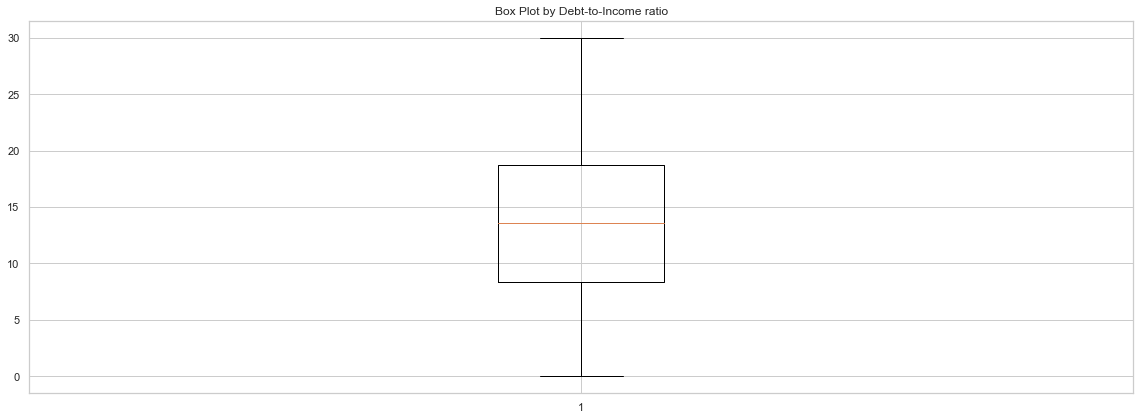

In [450]:
# Boxplot by Debt-to-Income ratio

fig = plt.figure(figsize=(16,6))
plt.boxplot(loan_df["dti"])
plt.title("Box Plot by Debt-to-Income ratio")
plt.show()

Observation: The 25th percentile DTI stands at around 8 and 75th percentile is at around 18. No outliers are observed.

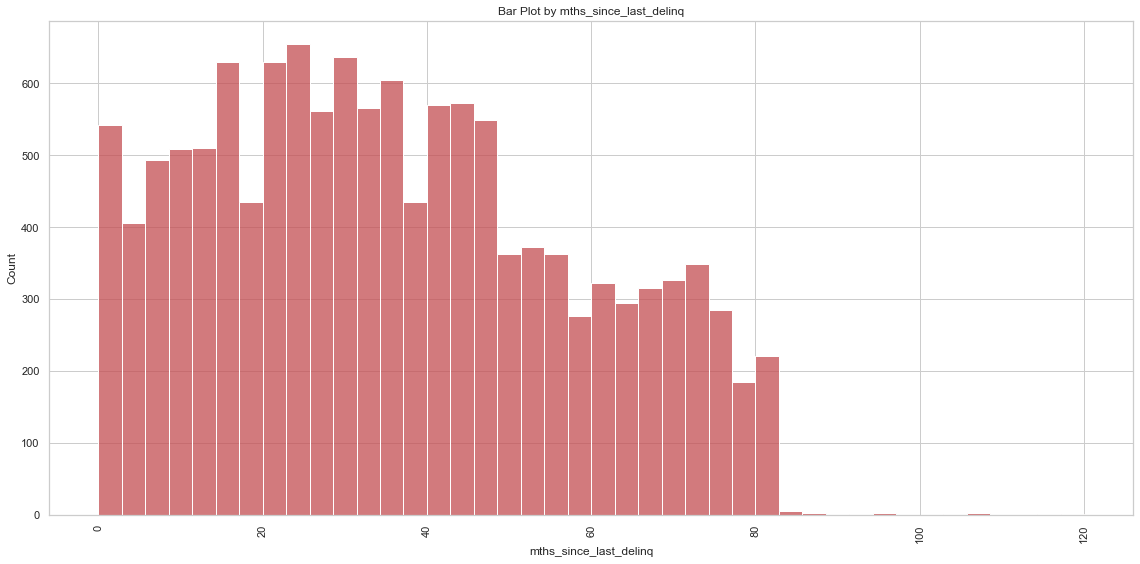

In [455]:
# Bar plot by 'mths_since_last_delinq'

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["mths_since_last_delinq"], color='r') 
plt.title("Bar Plot by mths_since_last_delinq")
plt.show()

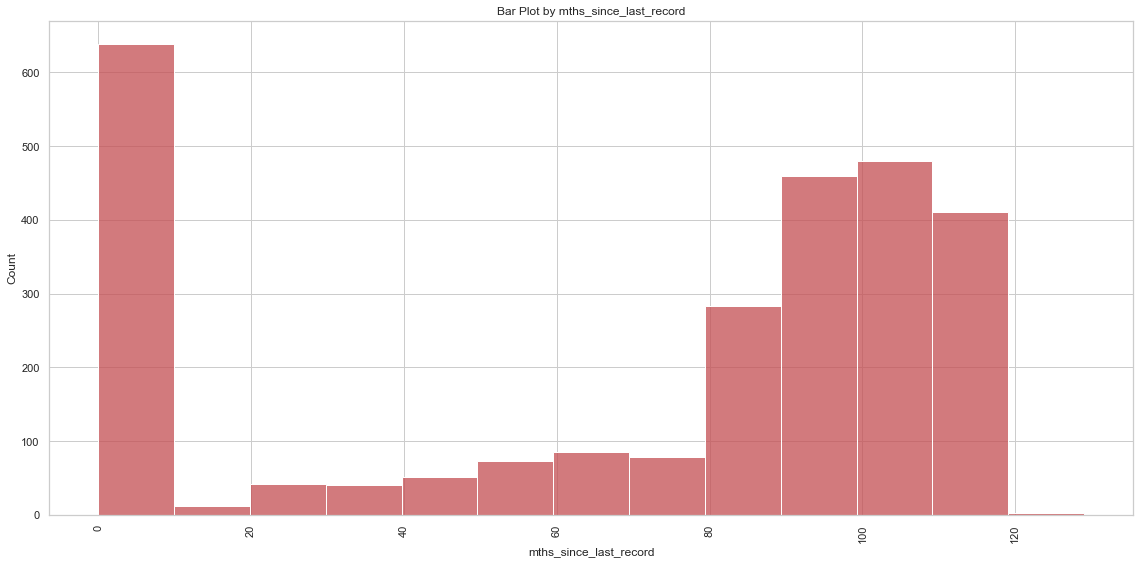

In [454]:
# Bar plot by 'mths_since_last_record'

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
plt.xticks(rotation=90)
sns.histplot(loan_df["mths_since_last_record"], color='r') 
plt.title("Bar Plot by mths_since_last_record")
plt.show()

#### Bivariate Analysis

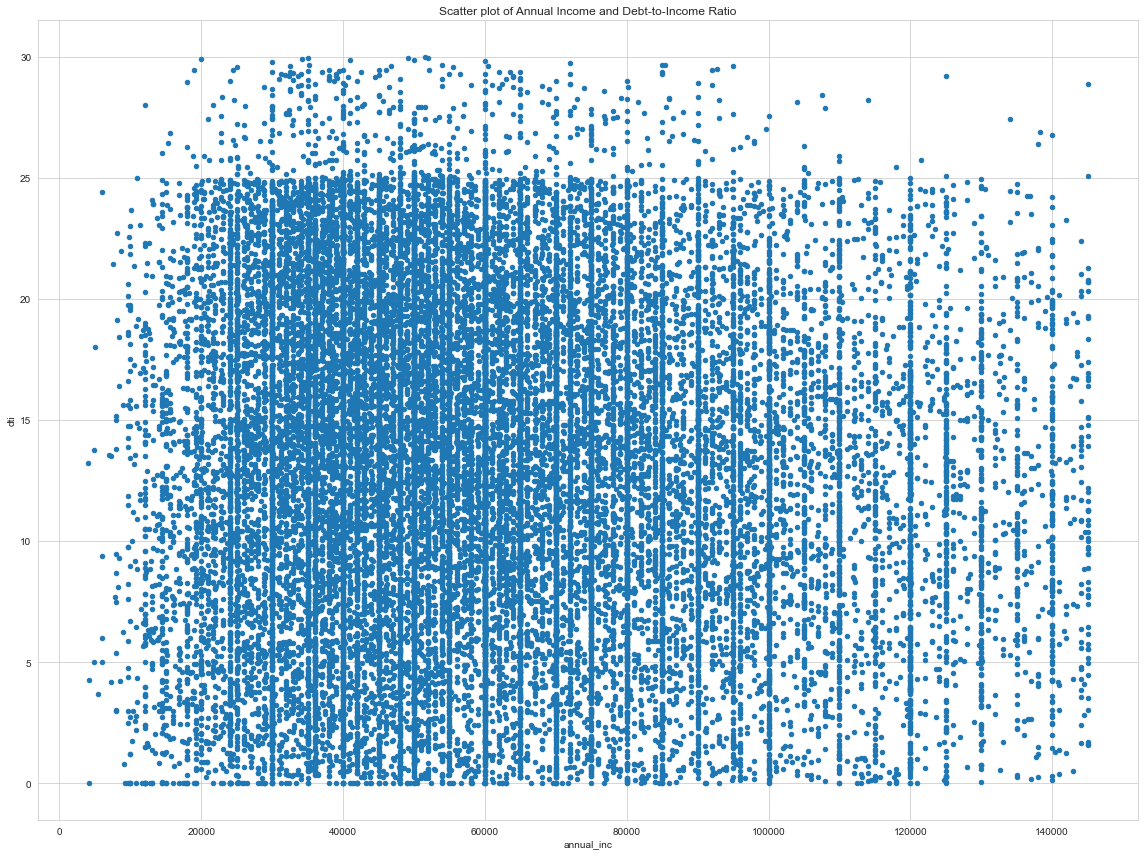

In [259]:
# Scatter plot of 'annual_inc' and 'dti'

loan_df.sample(30000).plot.scatter(x="annual_inc", y="dti", figsize=(16,12))
plt.xlabel("annual_inc")
plt.ylabel("dti")
plt.title("Scatter plot of Annual Income and Debt-to-Income Ratio")
plt.show()

Observation: The Debt-to-Income ratio for most of the loans are peaked at around 25. 

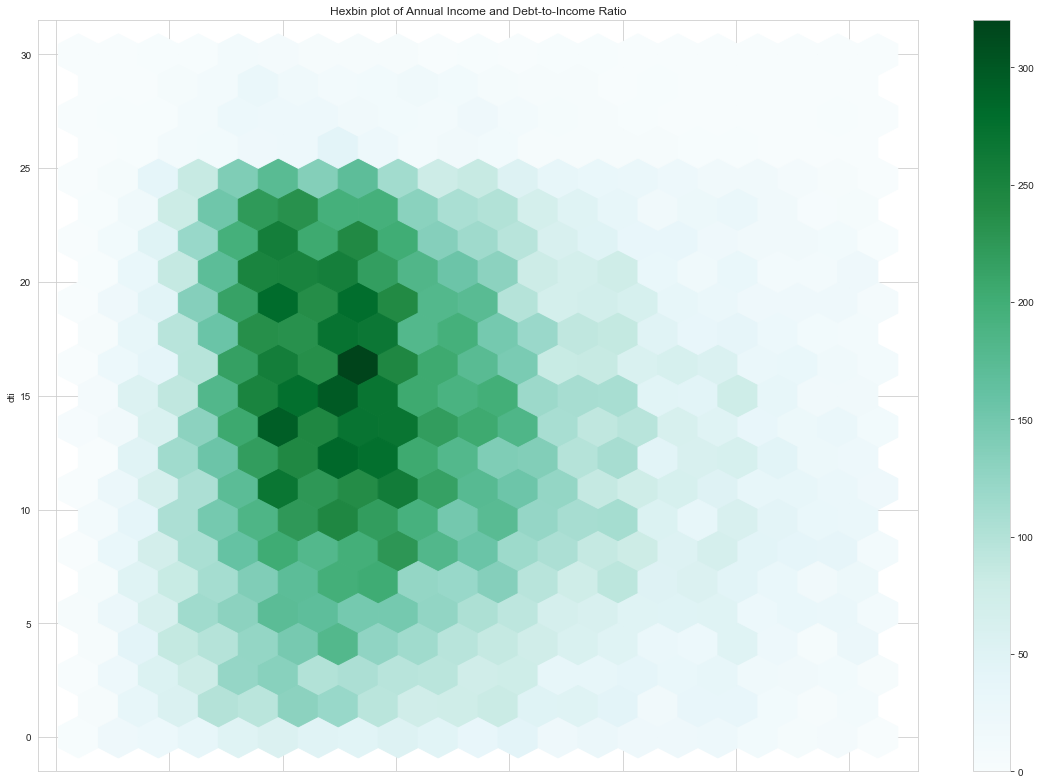

In [257]:
# Hexbin plot of 'annual_inc' and 'dti'

loan_df.plot.hexbin(x='annual_inc', y='dti', gridsize=20, figsize=(16,11))
plt.xlabel("annual_inc")
plt.ylabel("dti")
plt.title("Hexbin plot of Annual Income and Debt-to-Income Ratio")
plt.show()

Observation: The Annual Income to DTI correlation has a high density with DTI = 16 and Annual Income of 15000.

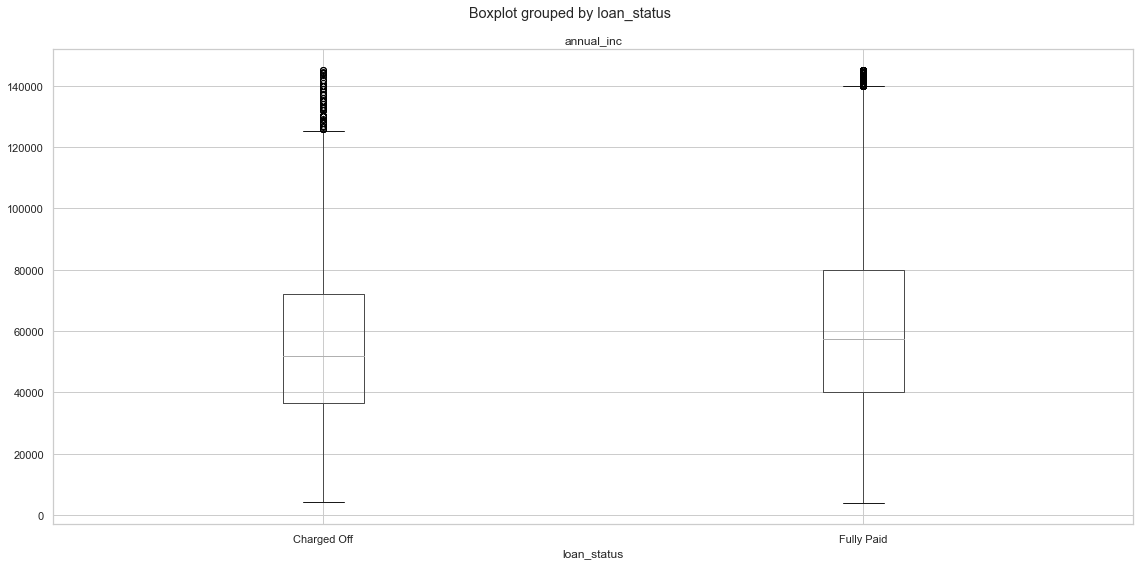

In [457]:
# Bivariate analysis (Categorical) using box plots of 'annual_inc' grouped by 'loan_status'

loan_df.boxplot(column="annual_inc",        # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size
plt.show()

Observation: The non-default loans has higher Annual Income that the one who are defaulted.

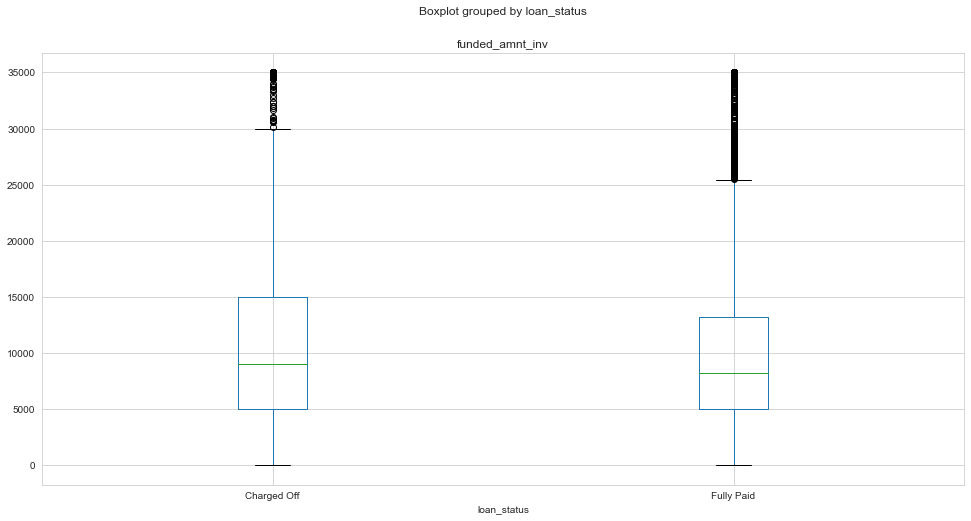

In [59]:
# Bivariate analysis (Categorical) using box plots of 'funded_amnt_inv' grouped by 'loan_status'

loan_df.boxplot(column="funded_amnt_inv",        # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size

plt.show()

Observation: The defaulted loans are typically with higher amounts.

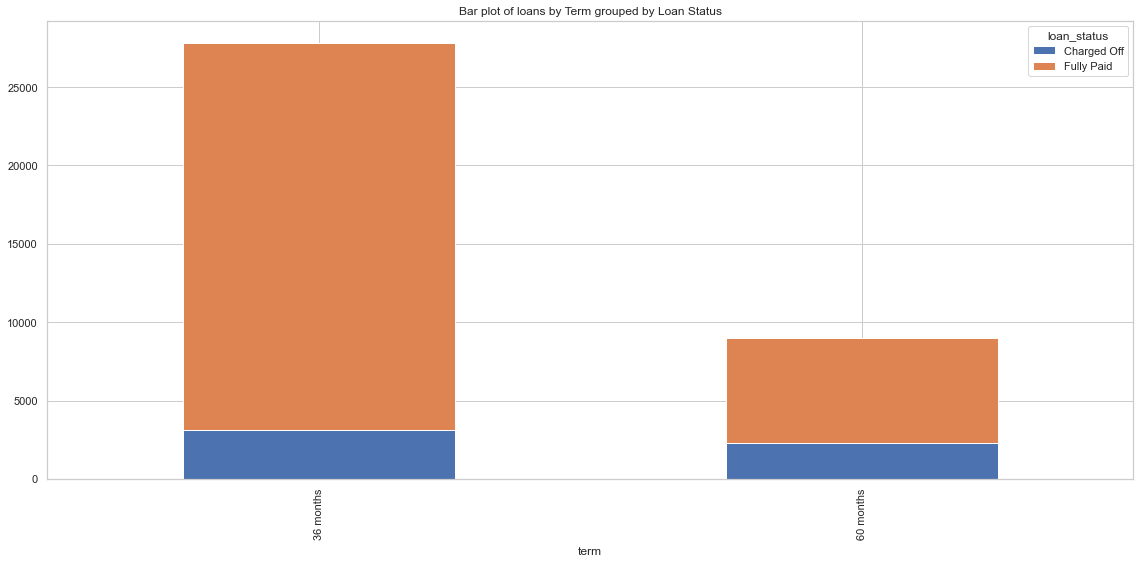

In [459]:
# Bivariate analysis (Categorical) using bar charts of 'term' grouped by 'loan_status'

term_default_table = pd.crosstab(index=loan_df["term"], 
                          columns=loan_df["loan_status"])

term_default_table
term_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Term grouped by Loan Status")
plt.show()

Observation: Higher percentage of loans are defaulted which has 60 months term.

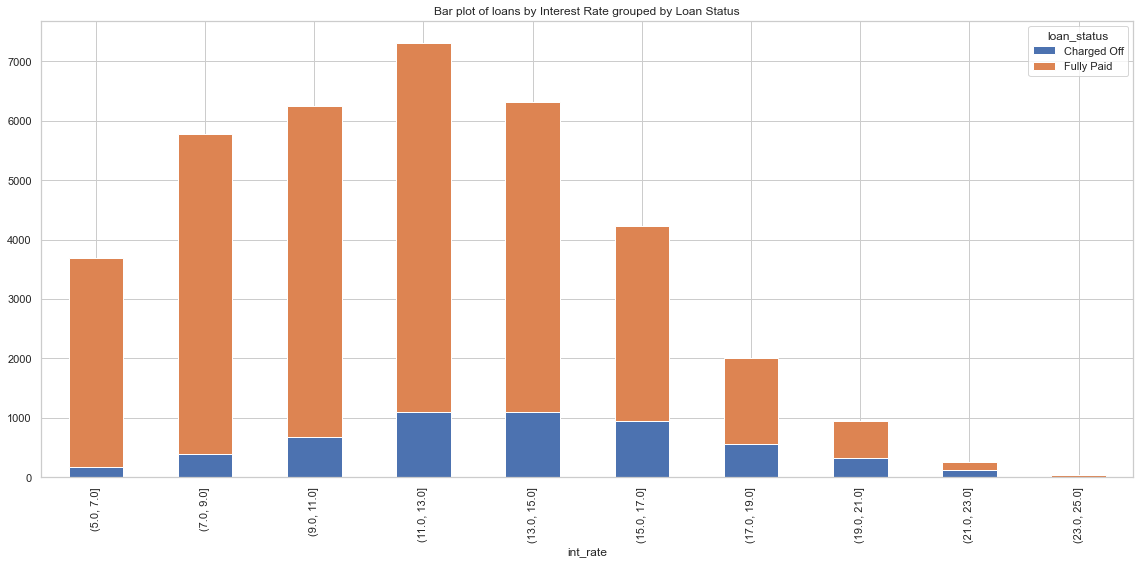

In [460]:
# Bivariate analysis (Categorical) using bar charts of 'int_rate' grouped by 'loan_status'

int_rate_default_table = pd.crosstab(index=loan_df["int_rate"], 
                          columns=loan_df["loan_status"])

int_rate_default_table
int_rate_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Interest Rate grouped by Loan Status")
plt.show()

Observation: The loans with interest rate between 13% and 15% are more likely to be defaulted. 

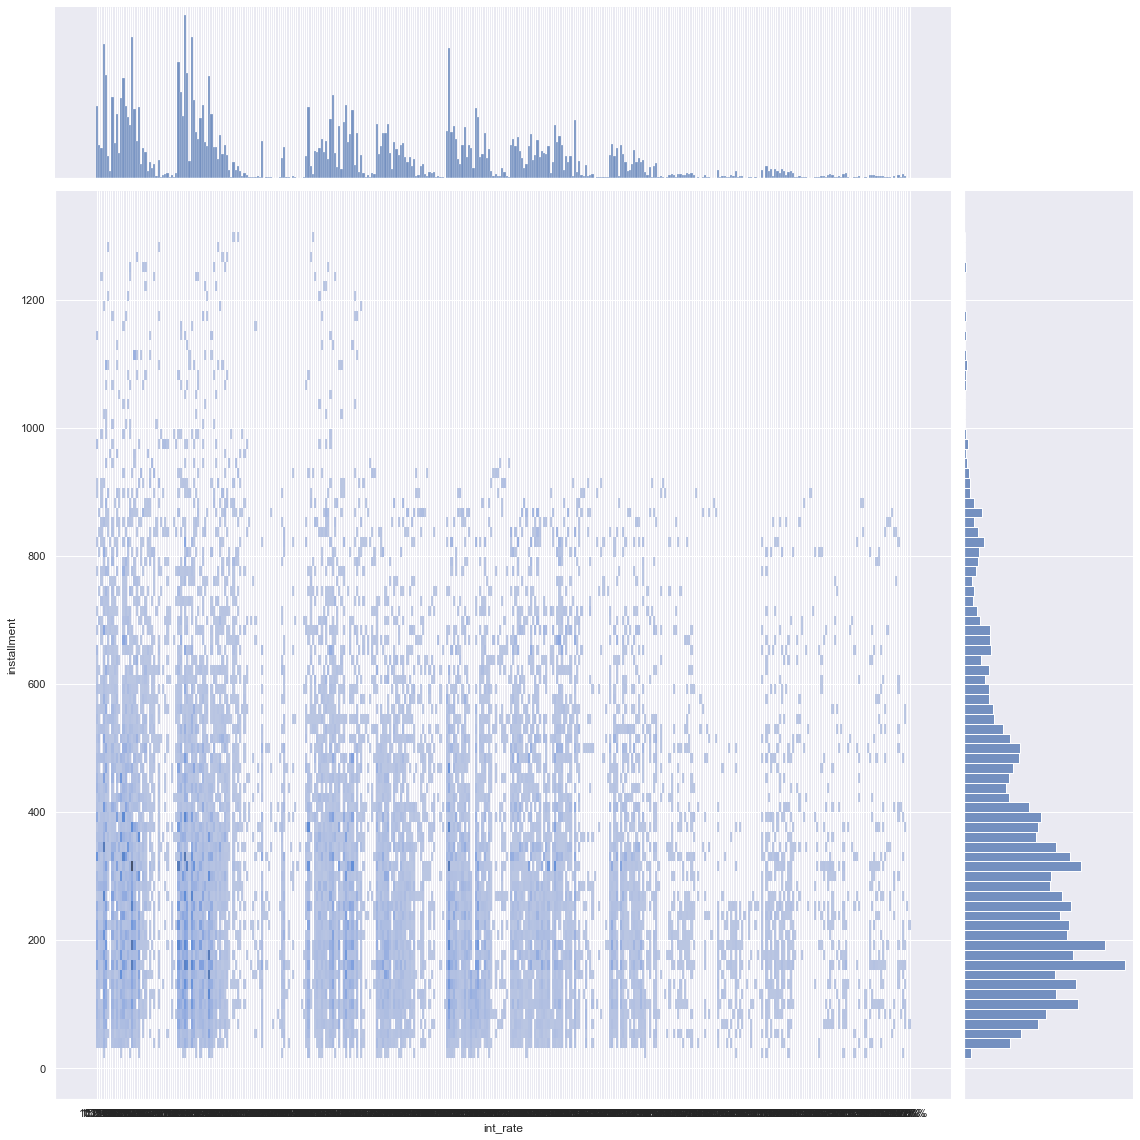

In [286]:
# Joint Plot of Interest Rate and Installment

sns.jointplot(data=loan_df, x="int_rate", y="installment", kind="hist", height=16)
plt.title("Joint plot of loans by Interest Rate and Installment")
plt.show()

Observation: The loans with installment and interest rate at lower side are more likely to be funded.

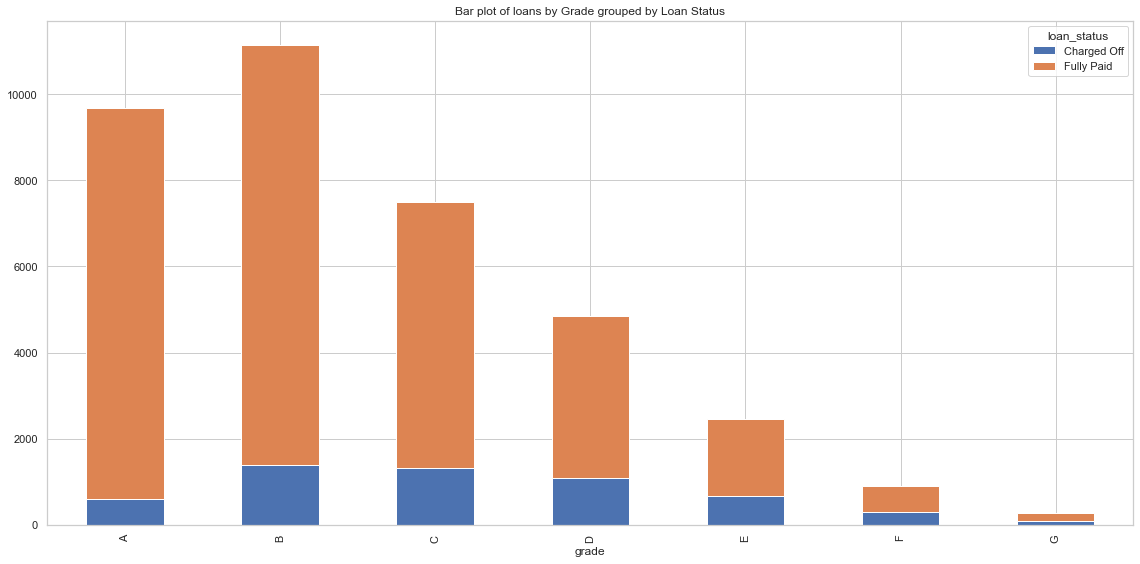

In [461]:
# Bivariate analysis (Categorical) using bar charts of 'grade' grouped by 'loan_status'

grade_default_table = pd.crosstab(index=loan_df["grade"], 
                          columns=loan_df["loan_status"])

grade_default_table
grade_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Grade grouped by Loan Status")
plt.show()

Observation: The loans with grade 'C', 'D' and 'E' are more likely to be defaulted. 

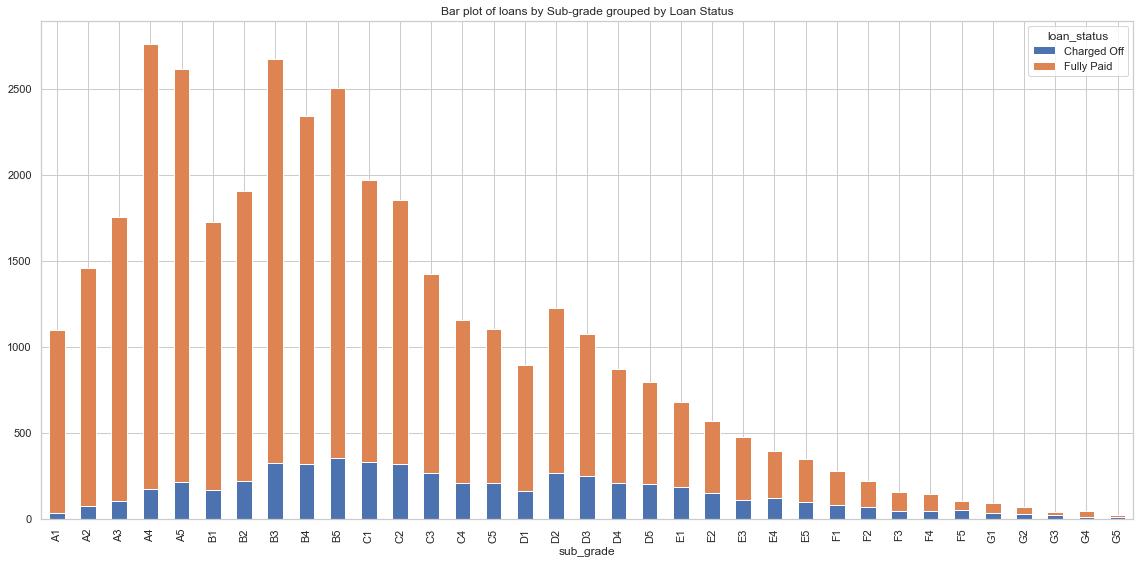

In [462]:
# Bivariate analysis (Categorical) using bar charts of 'sub_grade' grouped by 'loan_status'

sub_grade_default_table = pd.crosstab(index=loan_df["sub_grade"], 
                          columns=loan_df["loan_status"])

sub_grade_default_table
sub_grade_default_table.plot(kind="bar", 
             figsize=(16,8),
             stacked=True)
plt.title("Bar plot of loans by Sub-grade grouped by Loan Status")
plt.show()

Observation: The loans with sub-grade 'E1', 'E2', 'D2', 'D3', 'C3', 'C4' and 'C5' are more likely to be defaulted.

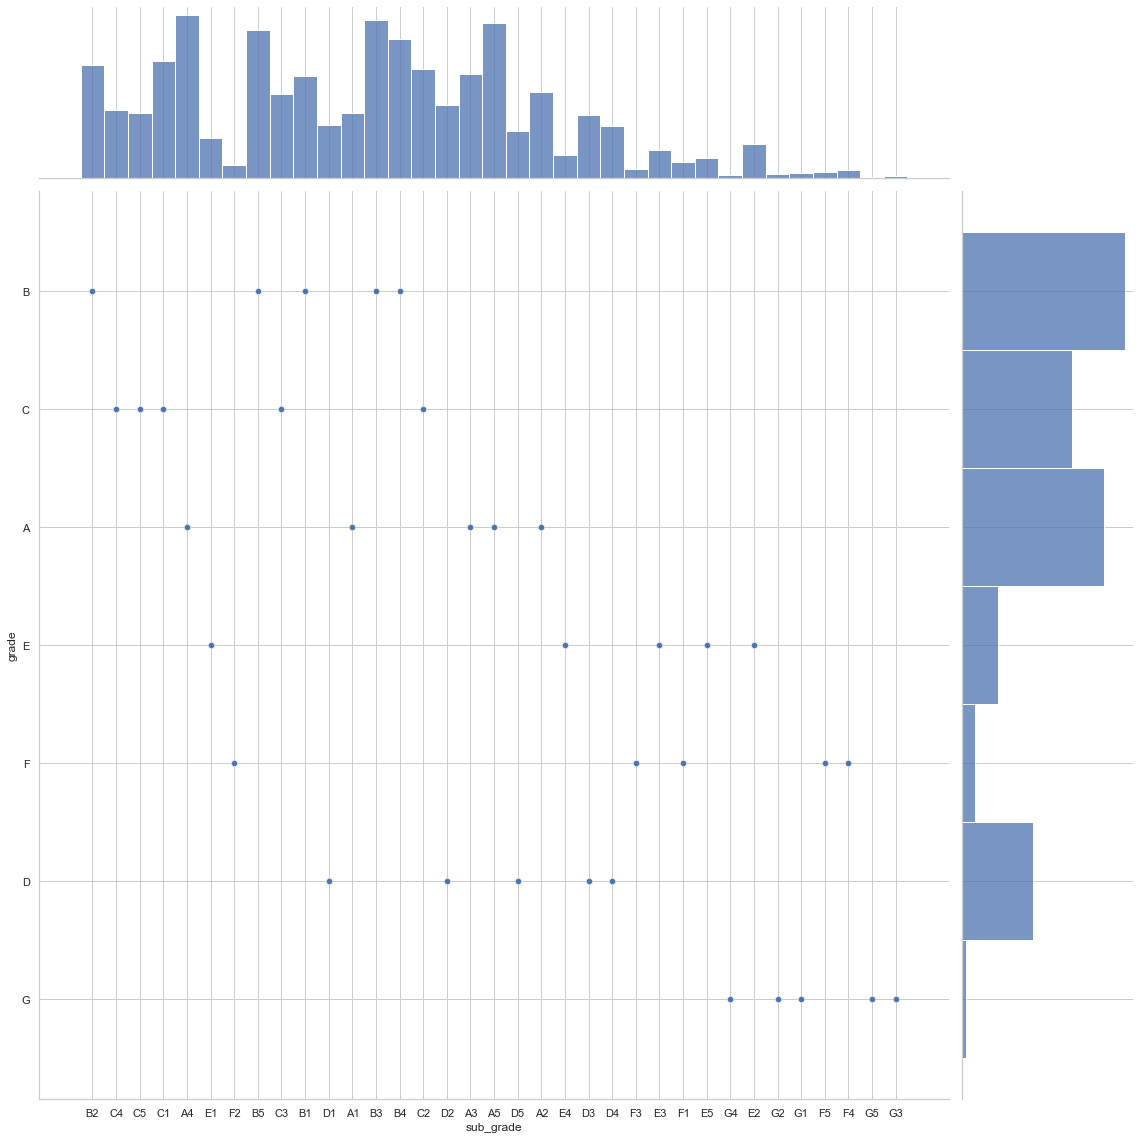

In [469]:
# Joint Plot of grade and Sub-grade 

sns.jointplot(data=loan_df, x="sub_grade", y="grade", height=16)
plt.xticks(rotation=90)
plt.show()

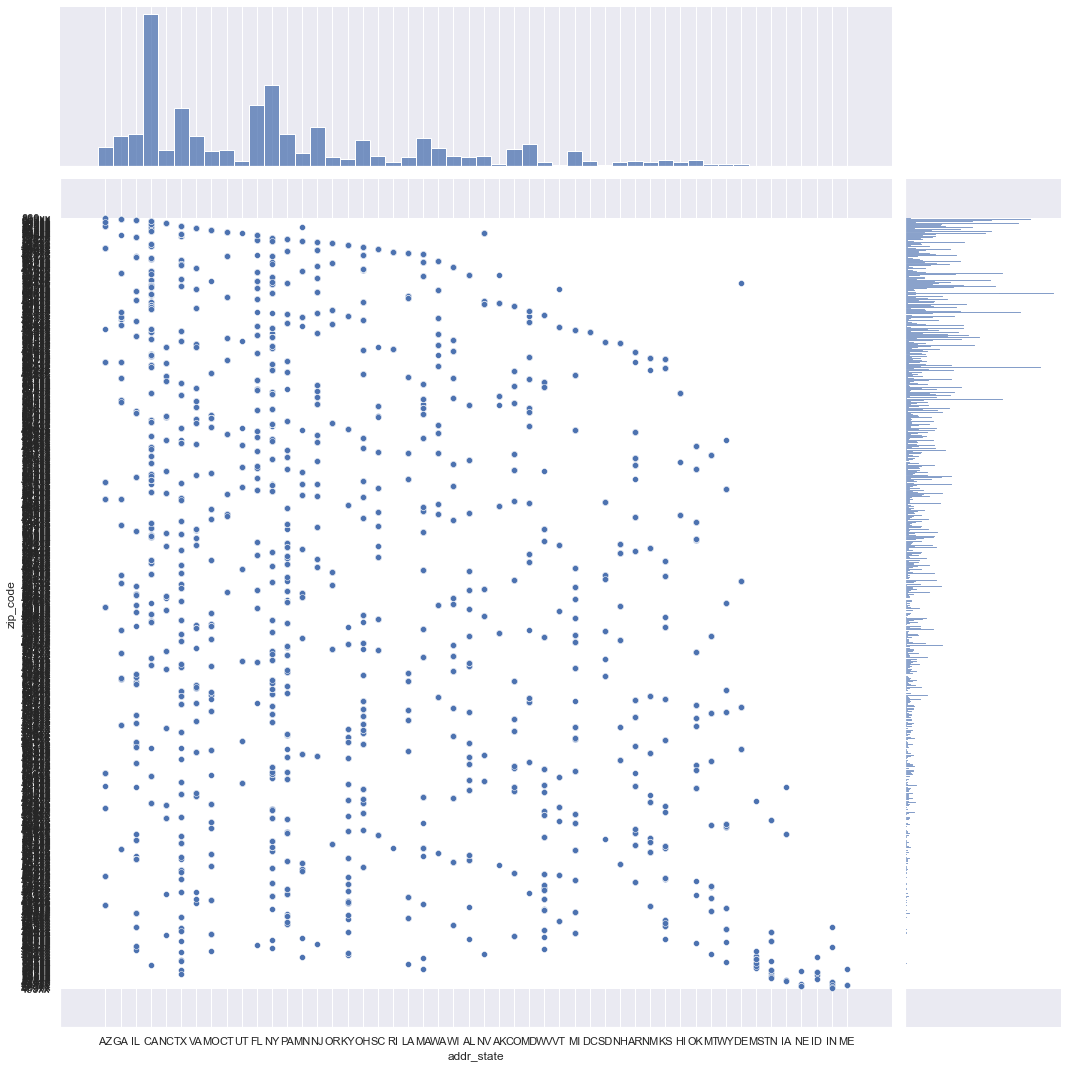

In [288]:
# Joint Plot of Address State and Zip Code

sns.jointplot(data=loan_df, x="addr_state", y="zip_code", height=15)
plt.xticks(rotation=90)
plt.show()

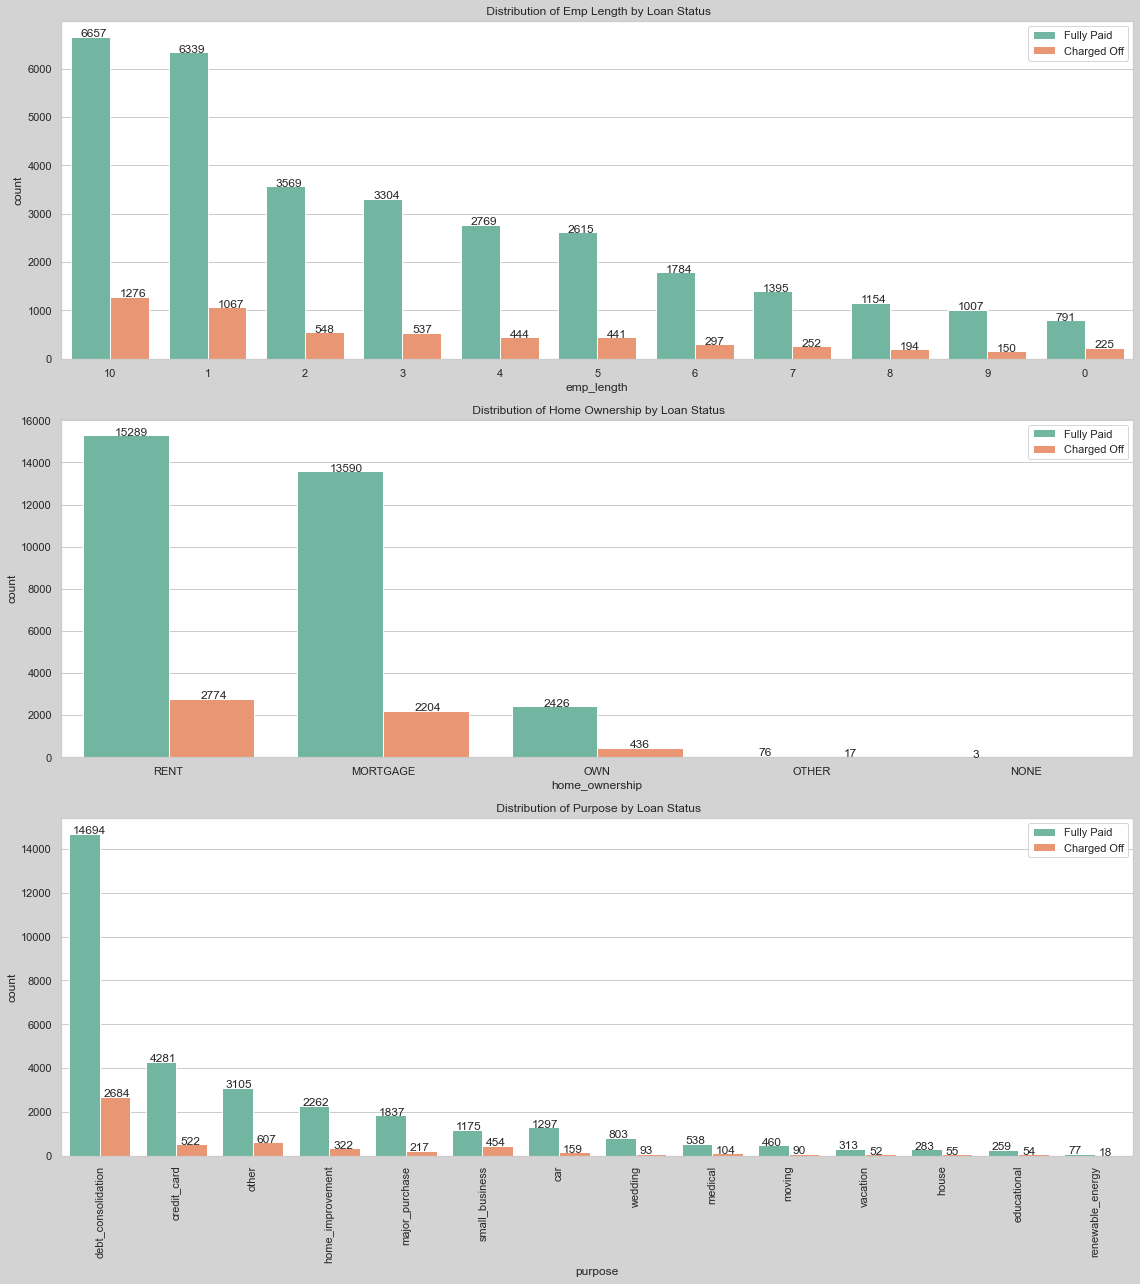

In [470]:
# Distribution of 'emp_length', home_ownership', 'purpose' by 'loan_status'

fig = plt.figure(figsize=(16,18))

plt.subplot(311)
a = sns.countplot(loan_df["emp_length"], 
                  order=loan_df["emp_length"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

#abs_values = loan_df['emp_length'].value_counts(ascending=False)
#rel_values = loan_df['emp_length'].value_counts(ascending=False, normalize=True).values * 100
#lbls1 = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
#lbls2 = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
#a.bar_label(container=a.containers[0], labels=lbls1)
#a.bar_label(container=a.containers[1], labels=lbls2)

for p in a.patches: 
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.title(" Distribution of Emp Length by Loan Status")

plt.subplot(312)
b = sns.countplot(loan_df["home_ownership"], 
                  order=loan_df["home_ownership"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

for p in b.patches: 
    b.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.15, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.title(" Distribution of Home Ownership by Loan Status")

plt.subplot(313)
c = sns.countplot(loan_df["purpose"], 
                  order=loan_df["purpose"].value_counts(ascending=False).index, 
                  palette="Set2",
                  hue=loan_df["loan_status"])

for p in c.patches: 
    c.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.05, p.get_height()+.01)) 

plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title(" Distribution of Purpose by Loan Status")

fig.set_facecolor("lightgray")

Observations:
1. The loans taken by borrowers with experience of 10 or more years, followed by borrowers with experience of 1 year or lower are more likely to be defaulted.
2. The loans taken by borrowers having the home rented or mortgaged have defaulted more.
3. The loans taken by borrowers for Debt Reconciliation have defaulted more.

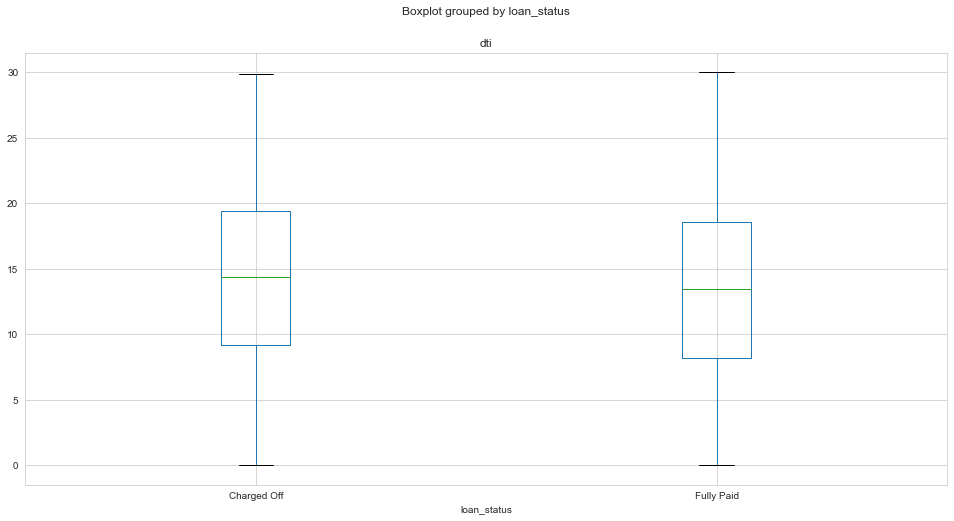

In [67]:
# Bivariate analysis (Categorical) using box plots of 'dti' grouped by 'loan_status'

loan_df.boxplot(column="dti",               # Column to plot
                 by= "loan_status",         # Column to split upon
                 figsize= (16,8))           # Figure size

plt.show()

Observation: The loan borrowers with lower Debt-to-Income ratio are more likely to be non-defaulter.

In [ ]:
# Relation of addr_state and zip_code with loan_status

by_state = (loan_df
            .groupby('addr_state')
#            .filter(lambda x : len(x) > 500)
#            .groupby(['zip_code', 'addr_state'])
            .size()
            .unstack()
           )

plt.figure(figsize=(16,10))
g = sns.heatmap(
    by_state, 
    square=True,                      # make cells square
    cbar_kws={'fraction' : 0.01},     # shrink colour bar
    cmap='OrRd',                      # use orange/red colour map
    linewidth=1                       # space between cells
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')
None # prevent the list of label objects showing up annoyingly in the output

### Driver Variables

1. dti (Debt-to-Income ratio)
2. purpose (Purpose of the loan)
3. home_ownership (Home Ownership Status)
4. emp_length (Employment Length)
5. term (Term)

### Recommendations:

1. Reject loans of loan applicants with dti (Debt-to-Income) ratio > 18.
2. Reject the loans for loan applicants having purpose of 'For Debt Reconciliation'. Also reduce the loan amount for loan applicants having purpose of 'Credit Card'.
3. Increase the Interest Rate for loan applicants with home ownership status as 'Rented' or 'Mortgaged' as the risk of lending is higher.
4. Verify the income sources and dti ratio before granting the loans to the loan applicants with experience of 10 years or more and with experience of 1 year and less.
5. The loans funded for higher terms are more likely to get defaulted, hence keep the interest rate on higher side to cover the risk.